# 2021.10.13

## 主要知识点
* sklearn pipeline
* 自定义数据清洗器
* 随机划分数据集

In [ ]:
# 一个较为标准的sklearn流程: 以OLS为例
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)


In [ ]:
# 创建一个自定义的数据清洗器
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [ ]:
# 随机选取训练集
import numpy as np
np.random.permutation()

In [ ]:
plt.plot(X[y==1, 0], X[y==1, 1], "g^") # 通过指定样式 g^可以间接选择sccater，而g-*就是plot

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            ) # 箭头，图形，注释

# 绘制等高线，zz是x0，x1的函数
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg) 
plt.clabel(contour, inline=1, fontsize=12)
# 为等高线内部填色
plt.contourf(x0, x1, zz, cmap=custom_cmap

# 2021.10.14

## 主要知识点
* softmax代码手写


## 手撸softmax（包含正则的梯度下降求解）
the equations we will need are the cost function:

$J(\mathbf{\Theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class Softmax(BaseEstimator, TransformerMixin):
    
    def __init__(
        self, 
        lr = 0.1, # 学习率
        max_iter = 5001, # 最大循环次数
        if_regu = True,
        alpha = 0.1, #正则化参数      
        early_stop = True
        ) -> None:
        super().__init__()
        self.lr = lr
        self.max_iter = max_iter
        self.regu = if_regu
        if if_regu:
            if not isinstance(alpha, float):
                raise NotImplementedError('please set alpha !')
            else:
                self.regu = True
                self.alpha = alpha
        self.early_stop = early_stop
    
    @staticmethod
    def _softmax(logits:np.array) -> np.array:
        exps = np.exp(logits)
        exp_sums = np.sum(exps, axis=1, keepdims=True)
        return exps / exp_sums
    
    @staticmethod
    def to_one_hot(y:np.array) -> np.ndarray:
        n_classes = y.max() + 1
        m = len(y)
        Y_one_hot = np.zeros((m, n_classes))
        Y_one_hot[np.arange(m), y] = 1
        return Y_one_hot
    
    def fit(self, X:np.ndarray, y:np.array) -> None:
    # fit softmax classifacation by gradient decend
        
        # init
        epsilon = 1e-7
        n_inputs = X.shape[1]
        n_outputs = len(np.unique(y))
        Theta = np.random.randn(n_inputs, n_outputs)  
        best_loss = np.infty 
        m = len(X)  # num of trainning set

        # label to one hot
        Y_one_hot = self.to_one_hot(y)
        
        # gradient decend
        for iteration in range(self.max_iter):

            # update theta
            logits = np.dot(X, Theta)
            Y_prob = self._softmax(logits)
            error = Y_prob - Y_one_hot
            if self.regu:
                gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), self.alpha * Theta[1:]]
            else:
                gradients = 1/m * X_train.T.dot(error)
            Theta = Theta - self.lr * gradients

            # calculate loss
            xentropy_loss = -np.mean(np.sum(Y_one_hot * np.log(Y_prob + epsilon), axis=1))
            if self.regu:
                l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
                loss = xentropy_loss + self.alpha * l2_loss
            else:
                loss = xentropy_loss
            
            if iteration%500 == 0:
                print(f'iteration : {iteration}, loss : {loss}')
            
            # early stop
            if self.early_stop:
                if loss < best_loss:
                    best_loss = loss
                else:
                    print(f'early stop at iteration {iteration - 1}, best loss = {best_loss}')
                    break
            self.Theta = Theta

    def predict(self, X_test:np.ndarray, prob = False) -> np.array:
        if prob:
            return self._softmax(X_test.dot(self.Theta))
        else:
            return np.argmax(self._softmax(X_test.dot(self.Theta)), axis = 1)

# 2021.10.15

## 主要知识点：
* 手写线性SVM
* 在sklearn中使用网格搜索训练模型

## 手写使用gradient decend的线性SVM

In [ ]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        # 随着迭代的次数实时修改学习率，次数越大，学习率越低
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1) # n feature weights
        b = 0

        m = len(X)
        t = y * 2 - 1  # -1 if t==0, +1 if t==1
        X_t = X * t
        self.Js=[]

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)

            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -self.C * np.sum(t_sv)
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

C=2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000, random_state=2)

## 通过网格搜索系统的训练一个模型

In [ ]:
# 读取数据
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [ ]:
# 测试模型
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
# 随机搜索 最佳参数
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

In [ ]:
# 测试最佳参数模型
rnd_search_cv.best_estimator_
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

# 2021.10.17
* 一些notes


In [ ]:
# sklearn某种分类器既可以输出分类分数，也可以输出类别：
clf.decison_function(x)
clf.predict_proba(x)
clf.predict(x)

# 2021.10.19
## 知识点：
* 绘制决策边界
* 使用SVM的AdaBoost实现

In [ ]:
# 绘制决策边界
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

## 实现AdaBoost（SVM版本）

### Adaboost
在前一个分类器的残差基础上进行下一次学习
* step1:在带有权重的样本上进行学习，计算模型带权重的准确率
* step2:根据模型的准确率确定模型的voting权重
* step3:对模型错误分类的样本根据模型的voting权重进行样本的权重调整

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[y_pred != y_train].sum() / sample_weights.sum() # equation 7-1 计算模型准确率
        alpha = learning_rate * np.log((1 - r) / r) # equation 7-2 计算模型权重
        sample_weights[y_pred != y_train] *= np.exp(alpha) # equation 7-3 更新样本权重
        sample_weights /= sample_weights.sum() # normalization step 归一化样本

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
    else:
        plt.ylabel("")

save_fig("boosting_plot")
plt.show()

# 2021.10.21

* 一些notes


In [ ]:
import numpy as np
np.allclose(X,Y)    # 逐元素比较两个矩阵

# 2021.10.26

## 主要知识点：
* kmeans
* DBSCAN

## kmeans

In [ ]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k,    # 集群数量 
                random_state=42,
                n_init = 10,     # 初始化次数，模型会从多次初始化的结果中挑选一个.inertia_最小的
                init = 'random', # 初始化方式，默认为 k-means++
                algorithm = 'full') #算法，full为用全样本计算，默认为elkan
kmeans.fit(X)
distance = kmeans.transform(x) #计算x和各个中心点的距离
score = kmeans.inertia_ # 距离平方和
kmean.predict(x) #将新的点分配给最近的集群

In [ ]:
# 如何选择好的k
# 轮廓系数
# 轮廓系数 = （b-a）/max（a,b)
# a为与同一集群中其他样本的距离，b为平均最近集群距离，即某一个样本到另外一个集群样本的平均距离的最小值
# 轮廓系数=1代表样本离本集群很近，其他集群很远，0代表样本处于集群的轮廓上，而-1代表样本可能分配错误
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.lables_)

In [ ]:
from sklearn.metrics import silhouette_samples
# 对于每个样本计算轮廓分数，生成一个和labels形状一样的数组，里面储存着每个样本的轮廓分数，可以用来查看不同聚类的样本轮廓分数
score_samples = silhouette_samples(X, kmeans.labels_) 

## DBSCAN

* 对每个实例，算法寻找其附近epsilon距离的实例数量
* 实例数量超过min_samples的实例成为核心实例
* 核心实例的epsilon区域内可能包含其他核心实例，核心实例连接形成集群

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples = 1000, noise = 0.05)
dbscan = DESCAN(eps = 0.05, min_sample = 5)
dbscan.fit(X)

In [ ]:
dbscan.lables_          # 所有实例的标签
dbscan.components_      # 核心实例的坐标

值得注意的是，DBSCAN有fix_predict()方法，但是没有predict方法，即其无法预测新实例属于哪个集群，所以我们需要创建一个classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

# 这里我们仅仅在核心上训练了分类器，也可以选择在全样本上训练分类器，但是这样就没有发挥出DBSCAN的作用

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)
knn.predict_proba(X_new)

# 2021.10.28

## 知识点
* PCA
* 混合高斯模型
* Keras顺序模型
* 函数API网络
* 子类API构建网络
* 保存神经网络模型
* callback
* 使用sklearn的网格搜索为神经网络调参

In [ ]:
# 对样本分层抽样
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42) 
# n_spilt表示要获取多少组train/test数据集，这个数字决定了生成的generator的元素数量，比如这里的generator就只有一个元素
# test_size 如果是小数则表示所占比例
idx_generator = strat_split.split(olivetti.data, olivetti.target)

for train_idx, test_idx in idx_generator:
    pass

In [ ]:
# pca 降低维度
from sklearn.decomposition import PCA

pca = PCA(0.99) # 可以直接指定PCA的解释比例，让其自动选择n
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

## 混合高斯模型

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [ ]:
# 混合高斯模型的一些参数
gm.weights_ #不同高斯分布的权重
gm.means_ #高斯分布的均值矩阵
gm.covariances_ #高斯分布协方差矩阵
gm.n_iter_ #拟合次数

In [ ]:
# 混合高斯模型的一些方法
gm.predict(X)
gm.predict_proba(X)
X_new, y_new = gm.sample(6)
pdf = gm.score_samples(X) #生成在X处的log(pdf)值，pdf的积分等于1
# 如果这个值非常小，则可以近似的认为这个点是一个离群点，因此这个指标可以为样本进行异常检测。

In [ ]:
# 混合高斯模型可以在训练数据后产生新的数据样例
n_gen_samples = 20
gen_reduced, y_gen = gm.sample(n_samples=n_gen_faces)
gen_x = pca.inverse_transform(gen_reduced)      #PCA的逆向转换

## 用kears构建神经网络

In [3]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras        # tf.keras实现了kerasAPI以及一些额外的tf的特定功能，这里我们选择使用这个包

# Common imports
import numpy as np
import os

In [4]:
tf.__version__

'2.4.2'

In [5]:
keras.__version__

'2.4.0'

## 顺序模型

In [6]:
# 建立一个简单的神经网络
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation=keras.activations.relu),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


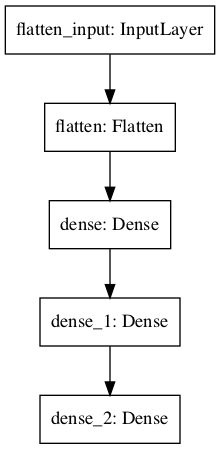

In [9]:
keras.utils.plot_model(model)

In [13]:
hidden1 = model.layers[1]

In [14]:
weights, bias = hidden1.get_weights()

In [15]:
weights

array([[ 0.03889441,  0.06243019,  0.02490912, ..., -0.02448691,
         0.06236339,  0.0085483 ],
       [ 0.06718743, -0.032793  ,  0.07377245, ..., -0.06441668,
        -0.00186466,  0.04859214],
       [-0.01259819,  0.05956532, -0.04802169, ..., -0.0145949 ,
         0.02444635,  0.07383755],
       ...,
       [-0.0533022 , -0.04698312, -0.06636278, ..., -0.05220167,
        -0.0393664 ,  0.01340114],
       [ 0.07011238, -0.07282688, -0.01296387, ...,  0.0263719 ,
        -0.03069232, -0.05637704],
       [ 0.07345013,  0.01440507,  0.01574823, ..., -0.02626022,
        -0.06853627, -0.00786755]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [ ]:
# 初始化模型完成后，我们需要对于模型进行编译，指定损失函数，优化器等
model.compile(
    loss = keras.losses.CategoricalCrossentropy,
    optimizer = keras.optimizers.SGD,
    metrics = [keras.metrics.SparseCategoricalAccuracy]
)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

In [ ]:
# fit方法返回一个histroy对象，这个对象包括
history.params #训练设置的参数
history.history.keys() #每轮结束后测得的一些指标
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 利用这个指标可以查看训练效果
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
# 调整了一系列超参数后，可以进行测试
model.evaluate(X_test, y_test)

## 函数API创建更为复杂的网络

### 一个多输入的例子

In [17]:
# 顺序模型的几何结构过于简单，可以用函数API创建结构更加复杂的网络
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
______________________________________________________________________________________________

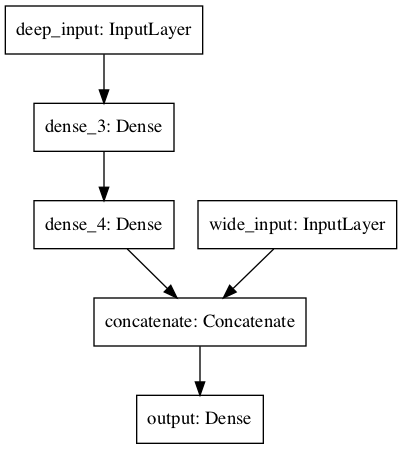

In [19]:
keras.utils.plot_model(model)

In [ ]:
# 这样的模型在输入数据的时候也需要将数据分开进行输入
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 将输入特征分为两部分，一部分深入加工，一部分直接线性输入
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

### 一个多输出的例子

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

# 只需要在output里添加即可
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## 使用子类API构建网络

In [ ]:
# 子类无法检查类的形状，比较容易出错
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

## 保存模型

In [ ]:
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")

## CallBack

callback是指在神经网络某些训练节点结束后调用的实例，将他们作为callback参数传给fit，就会触发这个操作

In [ ]:
# 第一个call，会在每次训练后保存模型，并且只保存在验证集上表现最好的模型
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
# 第二个callback会执行early stop操作防止过拟合以及资源的浪费
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

mse_test = model.evaluate(X_test, y_test)

In [ ]:
# 也可以定义自己的callback类
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
    
    def on_epoch_begin(self, epoch, logs):
        pass
    
    def on_train_begin(self):
        pass

    def on_train_end(self):
        pass

    def on_batch_begin(self, batch, logs):
        pass

    def on_batch_end(self, batch, logs):
        pass

### TensorbBoard

一种callback类，会随时记录训练数据，写入一个日志中，然后在网页端进行可视化

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

## 神经网络调整参数

神经网络的主要参数
* 层数
* 每一层神经元数量（在每一层增加神经元的效果不如加深层数）
* lr（最优学习率取决于其他参数，特别是batch size，修改这些参数后要对lr及时修改）
* 优化器
* batch size
* 激活函数

对于神经网络也可以使用网格搜索的方式，只不过要首先将神经网络包装为类似sklearn的模型，然后调用gridCV即可

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)  # 这里将神经网络包装为回归器，如果不传入参数的话，创建的模型会按照默认参数

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)]) # fit传入的参数会不变的传入模型中。

### 记录最佳lr，利用callback类进行记录

In [ ]:
# 在每个batch后按照一个特定的增速修改lr，查看最佳的lr
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

# 2021.11.15

## 知识点：
* 梯度消失和爆炸：dropout，激活函数，batchnorm
* 重用训练层的方法
* 各类优化器
* learning rate schedual
* 正则化：l1，l2，dropout

## 梯度消失与梯度爆炸问题

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras        # tf.keras实现了kerasAPI以及一些额外的tf的特定功能，这里我们选择使用这个包

# Common imports
import numpy as np
import os

In [2]:
# 解决梯度爆炸的第一个方法：不同的参数初始值设置
# 查看不同的初始化类
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [4]:
# 第二个方法：非饱和的激活函数（sigmoid的梯度在尾端是0）
'''
relu通常是一个较为常见的选择，但是relu面临一个“死亡神经元”的问题，因为在输入负数的时候，relu只会输入0，所以有很多在负数输入端改进relu的函数
'''
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [5]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

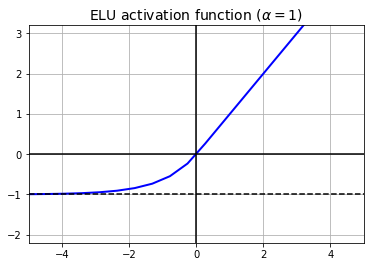

In [9]:
import matplotlib.pyplot as plt
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)
z = np.linspace(-5,5,20)
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [ ]:
# 使用不同的relu对网络进行训练
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

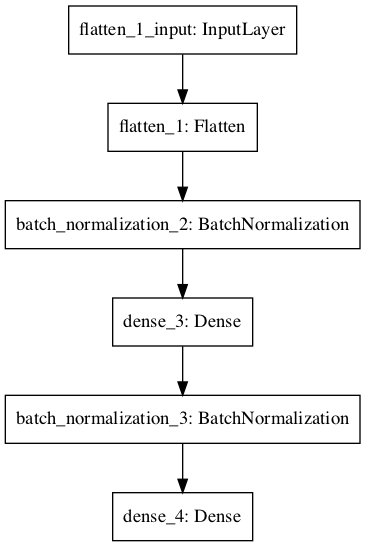

In [12]:
# 第三个重要的方法： batch norm
"""
batch norm 首先对于每个batch在经过每一层的时候进行标准意义上的标准化，但是进行标准化之后还会对于这个量进行偏移，而这个偏移的参数是通过网络进行学习的。
"""
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation = 'softmax')
])

keras.utils.plot_model(model)

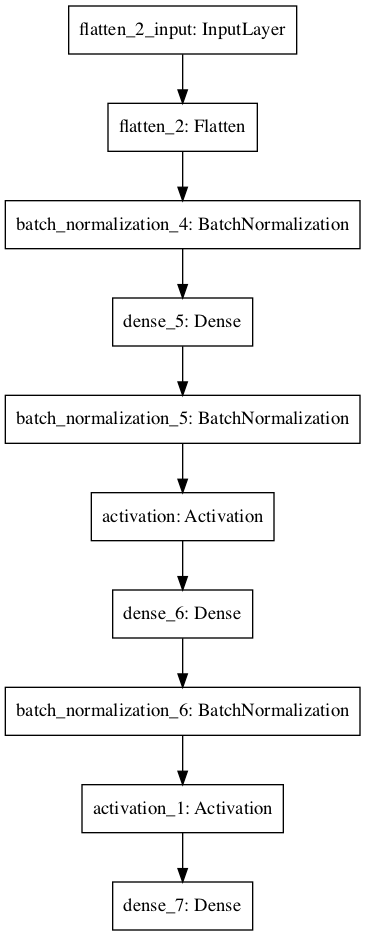

In [13]:
# BN论文的作者主张在激活函数之前进行BN，所以一般将BN添加在计算层之前，就像刚才做的一样
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False) # 因为BN已经带权重，所以在Dense需要不用bias,
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])
keras.utils.plot_model(model)

### BN的两个重要的参数：
* omentum：更新batch平均值和标准差时候的移动平均系数 （因为最后的predict要使用这个均值和标准差）
* axis：标准化的轴，默认是-1，即最后一个轴

## 重用训练层

如果能够找到一个任务相似但是已经训练好的神经网络，那么可以通过重新使用这个网络的前几层并且添加几个新的层对于新任务进行训练，这样的训练速度通常会快很多
* 比如有一个对于100个物品图片进行分类的网络，利用这个网络的前几层添加一些新的网络层就可以对100种汽车进行分类。
* 进行迁移学习时，可以先解冻很少的层，利用训练查看效果，然后不断解冻更早的层，查看效果是否有所提升。

In [ ]:
# 一个使用keras进行迁移学习的例子
# 复制一个网络以及它的参数，将其嫁接到一个新的网络上去
model_A = keras.models.load_model("my_model_A.h5")
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
# 先冻结之前已经训练好的网络，对于新嫁接的网络参数进行一定的训练
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

In [ ]:
# 对于所有层打开冻结，重新进行训练
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

## 更快的优化器

优化器的基本思想有三个：
* 更新梯度的同时考虑之前的梯度（动量）
* 在目前参数偏移向梯度方向的点求梯度（Nesterov）
* 通过不同参数梯度的方差调整不同方向的下降速度（AdaGrad）
* 其余的方法都是这些思想的组合

### Momentum optimization

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

### Nesterov Accelerated Gradient

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

### AdaGrad

In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

### RMSProp

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

### Adam

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## 学习率调度：learning rate schedual

In [ ]:
# 自己制定一个LRS
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:
# 创建一个模型
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [ ]:
# 将scheduale作为一个callback方法传入网络中去
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

#### keras默认在每个epoch后更新lr，但是也可以自己写callback在每个iteration后进行更新

In [ ]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

### pairwise 调度

In [ ]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

### performence调度
根据模型的表现进行学习率的调整

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
# 当连续5个轮次最好的验证损失没有改善的时候，lr *= 0.5

### 对于以上的调度模型，可以通过keras内置模型进行实现

In [ ]:
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)

learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

### 1周期调度

一周期调度的思想：
* 选择一个最优学习率n（可以通过在batch上记录validation loss和lr的方法）
* 在学习开始时，将lr设定为n/10或者一个比n小的值
* 在学习iteration的前半段，从n/10线性增大到n
* 在学习iteration的后半段，从n线性减小到n/10

主要步骤：
* 确定最优学习率
* 计算总iteration，通过插值的方式进行每个batch的lr


In [ ]:
# 首先找出最佳lr作为n
K = keras.backend   # keras的后段接口，可以进行变量的计算，复制，提取等。暂时理解为一个变量操作接口。
# https://tensorflow.google.cn/versions/r2.1/api_docs/python/tf/keras/backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

# 输入模型，通过每个batch调整lr并且记录batch的loss来确定最佳lr
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)

In [ ]:
# 定义一周期lr callback类
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate  # 最优lr，通过刚才的程序确定
        self.start_rate = start_rate or max_rate / 10  # 起始lr，如果没有输入则计算n/10
        self.last_iterations = last_iterations or iterations // 10 + 1 .  #最后一个iter 
        self.half_iteration = (iterations - self.last_iterations) // 2 # 通过输入的last iter确定的中间iter位置
        self.last_rate = last_rate or self.start_rate / 1000 # 最后几个iter要达到的lr
        self.iteration = 0   # 初始化iter

    def _interpolate(self, iter1, iter2, rate1, rate2):
        """ 插值计算lr
        """
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    
    def on_batch_begin(self, batch, logs):
        # 如果在前半段
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        # 如果在后半段
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        # 如果已经到最后几个itr
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [ ]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

## 正则化方法

### l1 & l2正则化

In [ ]:
# 可以通过keras创建带有l1或者l2或者l1+l2正则化的层
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

### dropout（神经网络的集成学习）

只需要在想要dropout的层后添加dropout层即可

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

如果模型过拟合，可以考虑增大dropout rate，如果模型欠拟合，可以考虑减小dropout rate

# 2021.11.16

## 知识点：
* TF基本操作
* TF数据类型
* 自定义损失函数
* 自定义其他结结构
* 自定义metric
* 自定义层
* 自定义模型
* 自定义模型内部损失
* 自动微分
* 手动实现深度学习训练流程
* 自定义optimizer
* 练习题：尝试构建一个网络结构，上下层网络使用的优化器和学习率不同

## 使用Tensoflow自定义模型与训练

### Tf基本操作

#### 和numpy类似的张量操作

In [19]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]]) # matrix
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [18]:
t.dtype

tf.float32

In [21]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [22]:
# 索引方式与numpy相同
t[:,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [23]:
# 张量操作
tf.square(t)
t + 10
tf.transpose(t)
tf.exp(t)
tf.reduce_max(t)
tf.reduce_mean(t)
tf.reduce_prod(t)
# ......

<tf.Tensor: shape=(), dtype=float32, numpy=720.0>

In [24]:
# 如果想让keras模型更好的移植，建议使用keras底层API进行张量操作
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

In [26]:
# tf和np的操作通常可以混合，但是注意np默认使用float64，而tf默认使用float32，所以在用np创建张量的时候需要初始化为32
a = np.array([2., 4., 5.], dtype = np.float32)
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 5.], dtype=float32)>

In [27]:
np.sqrt(tf.constant(a))

array([1.4142135, 2.       , 2.236068 ], dtype=float32)

In [28]:
# tf 对于type的要求较为严格，无法计算不同type的数据，甚至32和64都无法合并
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [29]:
# 可以使用tf.cast()改变张量的数据类型
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

变量的操作

In [30]:
v = tf.Variable([[1,2,3],[4,5,6]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [31]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 8, 10, 12]], dtype=int32)>

In [33]:
v.scatter_nd_update(indices=[[0,0]], updates=[100])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[100,   4,   6],
       [  8,  10,  12]], dtype=int32)>

In [ ]:
v.assign_add()
v.assign_sub()
v.scatter_nd_add
v.scatter_nd_max
v.scatter_nd_min
# ......

### 其他数据类型

#### 稀疏张量

In [36]:
# 稀疏张量
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [37]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [38]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

#### Sets

每个集合由张量的最后一个轴上的向量表示，例如[[1,2,3], [0,1,4]]就是[1,2,3]和[0,1,4]组成的集合

通常用稀疏张量来表示集合间的运算结果

In [39]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [46]:
print(tf.sets.union(set1, set2))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [1 0]
 [1 1]
 [1 2]
 [1 3]], shape=(10, 2), dtype=int64), values=tf.Tensor([ 2  3  4  5  6  7  0  7  9 10], shape=(10,), dtype=int32), dense_shape=tf.Tensor([2 6], shape=(2,), dtype=int64))


In [47]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [41]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

#### Tensor array : 张量的列表，size一般是固定的

一般要求所有的张量具有相同的大小和数据类型

In [42]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [43]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [44]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

### 自定义损失函数

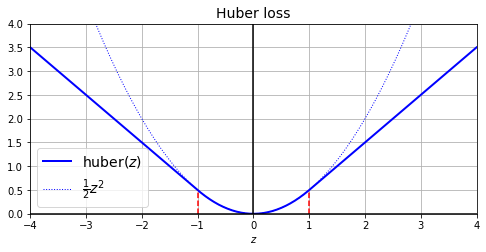

In [48]:
# huber损失函数：针对训练集噪声过大
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

为了在重载模型时更加方便，可以直接继承loss类进行损失函数的定义：

In [ ]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold = 1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = tf.abs(error) - 0.5
        return tf.where(is_small_error, squared_loss, linear_loss) 
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'threshold': self.threshold}  

In [ ]:
# 当保存模型时候，会调用get config将模型的参数全部保存
model.compile(loss=HuberLoss(2.), optimizer='nadam')
model.save('xxxx.h5')

In [ ]:
# 加载模型时，它会在HuberLoss类上调用from_config方法，该方法由基类实现
# 将**config传递给构造函数并生成实例
model = keras.models.load_model('xxxx.h5', custom_objects={'HuberLoss':HuberLoss})
model.loss.threshold

### 其他自定义结构

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# 激活函数
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

# 初始化权重
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

# 正则化
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

# constrain
def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [ ]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [ ]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

和loss相同，可以通过继承基类的方式来自定义组件：

In [ ]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        # 此处不需要调用父类get config方法
        return {"factor": self.factor}

In [ ]:
layer = keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer)

### 注意：
* 损失函数，层，激活函数，模型 的自定义需要实现call()方法
* 正则化，初始化，约束的自定义需要实现__call__()方法
* 对于指标，情况和以上都不同，参见下文：

### Custom Metrics

metric和loss不同，metric是用来评价一个模型好坏的量度。不要求metric可导或连续。

如果只用一个一般的函数作为metric，那么keras会在每个batch后计算对应bacth的metric，然后计算目前所有批次的均值。但是这样的计算很多时候是不正确的，如果metric是精准度的话，平均精准度并不是全样本的精准度。这就需要开发streaming metric，在每个batch后进行更新。

In [52]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        # add_weight 为类添加一个tf.variable作为属性
        self.total = self.add_weight("total", initializer="zeros") # 用来记录目前的metric总和   
        self.count = self.add_weight("count", initializer="zeros") # 用来记录目前的总样本数
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))  #更新metric
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32)) #更新样本数
    def result(self):
        return self.total / self.count # 最终输出的是metric之和/样本数
        # 如果想定义precision rate，那么metric就是一个dummy函数，正确为1，错误为0
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [53]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]])) 

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [54]:
model.compile(loss=keras.losses.Huber(2.0), 
              optimizer="nadam", 
              weighted_metrics=[HuberMetric(2.0)])
            

In [ ]:
model = keras.models.load_model("my_model_with_a_custom_metric_v2.h5",
                                custom_objects={"HuberMetric": HuberMetric})

更一般的，可以用keras.metrics.Mean类来直接实现这种平均型的metric

In [55]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        # 通过内置的函数直接更新总数和metric，这里的权重是对每个样本加权的权重
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}  

### 自定义层

通过继承layer类可以自定义层

In [ ]:
# 可以自定义一个dense层
class MyDense(keras.layers.Layer):

    def __init__(self, units, activation = None, **kwargs):
        super().__init__(**kwargs) #调用父类
        self.units = units # 指定输出维度
        self.activation = keras.activations.get(activation) # 指定该层要使用的激活函数
    
    def build(self, batch_input_shape):
        """
        build 函数在网络第一次被创建的时候调用，主要做一些权重初始化的工作
        """
        # 使用add_weight为该层网络添加权重和偏置，添加的形状应该根据batch size和unit决定
        self.kernel = self.add_weight(
            name = 'kernel',
            shape = [batch_input_shape[-1], self.units],
            initializer = 'glorot_normal' 
        )
        self.bias = self.add_weight(
            name = 'bias',
            shape = [self.units],
            initializer = 'zeros'
        )
        # 在最后一步使用该函数，提示这一层已经被建立，之后不需要重新运行
        super().build(batch_input_shape)
    
    def call(self, X):
        """
        神经网络层的计算
        """    
        return self.activation(X @ self.kernel + self.bias)
    
    def compute_output_shape(self, batch_input_shape):
        """
        计算输出的形状
        """
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        """
        为自定义层创建config，方便下次重复调用
        """
        base_config = super().get_config()
        return {**base_config, 
                'units':self.units,
                # 使用keras提供的函数将激活函数封装起来
                'activation': keras.activations.serialize(self.activation)}


In [ ]:
# 模型的重载
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [ ]:
# 定义一个能够为数据加上高斯噪音的层
class AddGaussionNoise(keras.layers.Layer):
    
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev #指定高斯噪音的std

    def call(self, X, training = None):
        if traning:
            noise = tf.random.normal(tf.shape(X), stddev = self.stddev)
            return X + noise

        else:
            return X
    def compute_output_shape(self, batch_input_size):
        return batch_input_size

### 自定义模型

如果能将常用的层组合封装成自己的模型，就可以在未来调用时候不用反复搭建模型

#### 这里首先实现一个层，该层将输入通过神经网络非线性结构后的结果和原始的输入结果相加

In [ ]:
class ResidualBlock(keras.layers.Layer):
    __doc__ = """
    该类实现将数据通过非线形运算后和原始数据线性相加
    """
    def __init__(self, n_layers, n_neurons, **kwargs):
        """
        n_layers: 非线性层的深度
        n_neurons: 非线性层的ouput dim
        """
        super().__init__(**kwargs)
        self.hidden = [
            keras.layers.Dense(n_neurons, activation='elu', kernel_initializer='he_normal')
            for _ in range(n_layers)
        ] #创建非线形层列表

    def call(self, inputs):
        Z = inputs
        for layer in self.layers:
            Z = layer(Z)
        return input + Z
    
    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            'n_layers': self.n_layers,
            'n_neurons': self.n_neurons
        }

#### 通过上面实现的层，可以自己封装一个小的模型

In [ ]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.output_dim = output_dim
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            'output_dim': self.output_dim
        }

In [ ]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

### 自定义模型内部损失

#### 要基于模型内部定义自定义损失，根据所需模型的任何部分进行计算，然后将结果传递给add_loss()方法

比如这里我们想构建一个MLP模型，该模型不仅要考虑预测损失，还要考虑对于样本的重建损失（最大程度的保留样本的信息），实现方法是在最终输出的前一层增加一层辅助输出，这一层用于重建样本，这一层的均方损失称为重建损失，将这个重建损失以一定的比例加入到最终的损失中去。

In [ ]:
class ReconstructingRegressor(keras.Model):
    __doc__ = """实现了包含重建误差的神经网络结构，能够在MSEloss意义下更大程度的保留input的所有信息
    """
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        # 构建一个深度为5层的神经网络，用于数据的非线性特征提取
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        # 最后一层的设置
        self.out = keras.layers.Dense(output_dim)
        # 初始化重构metric，这里同样适用streaming metric
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        # 单独创建一层重建层，用于衡量重建误差
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)

    def call(self, inputs, training=None):
        # 将input依次通过网络结构
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        # 在输出的前一层，将数据喂入重建层
        reconstruction = self.reconstruct(Z)
        # 计算重建误差，并且将该误差赋予0.05的权重加入到最终的误差中去
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        # 如果在训练中，将重建metric加入到最终的metric去
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        # 将Z经过最终层的结果进行输出
        return self.out(Z)

### 自动微分

可以利用tf.GradientTape()创建自动微分环境，计算自动微分

In [2]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [4]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

值得注意的是，经过一次正向反向传播后，tape就会消失

In [8]:
try:
    gradients = tape.gradient(z, [w1, w2])
    gradients
except RuntimeError as ex:
    print(ex)

A non-persistent GradientTape can only be used tocompute one set of gradients (or jacobians)


In [9]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # works now!
del tape

当有多个y对x的导数时，tape会自动对其求和

In [10]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

### 手动实现深度学习训练

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# 一些初始设置
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [ ]:
for epoch in range(1, n_epochs + 1):
    # 第一层循环，进入某一个epoch
    print("Epoch {}/{}".format(epoch, n_epochs))
    
    # 第二层循环，进入某一个batch
    for step in range(1, n_steps + 1):
        # 随机的提取该batch的数据
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        # 前向传播，计算损失函数
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            # 计算这个epoch的平均loss
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            # 将损失函数的loss和正则化的loss相加
            loss = tf.add_n([main_loss] + model.losses)
        # 通过反向传播计算梯度
        gradients = tape.gradient(loss, model.trainable_variables)
        # 通过optimizer更新梯度
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        # 加上constrain
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        # 计算平均loss
        mean_loss(loss)
        # 记录metric数据
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()
          

### 自定义Optimizer

In [13]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="MyMomentumOptimizer", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._set_hyper("decay", self._initial_decay) # 
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "momentum")

    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
        momentum_var = self.get_slot(var, "momentum")
        momentum_hyper = self._get_hyper("momentum", var_dtype)
        momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)* grad)
        var.assign_add(momentum_var * lr_t)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

### 练习题

#### 1 构建一个batch norm网络层

In [16]:
class MyBatchNormalizition(keras.layers.Layer):

    def __init__(self, eps = 1e-4, **kwargs):
        supre().__init__(**kwargs)
        self.eps = eps # 一个很小的整数，防止处以0
    
    def build(self, batch_input_shape):
        # 这一步需要创建两个变量alpha和beta，分别代表标准化后修正的乘数和偏移，维度和input的最后一个维度相同（特征数）
        self.alpha = self.add_weight(
            name = 'alpha',
            shape = batch_input_shape[-1:],
            initializer = 'ones'
        )        
        self.beta = self.add_weight(
            name = 'beta',
            shape = batch_input_size[-1:],
            initializer = 'zeros'
        )
        super().build(batch_input_size)
    
    def call(self, X):
        mean, varience = tf.nn.moments(X, axis = -1, keepdims=True)
        return self.alpha * (X - mean)/(tf.sqrt(varience + self.eps)) + self.beta

    def compute_output_size(self, batch_input_shape):
        return batch_input_shape

    def get_config(self):
        base_config = super().get_config()
        return {**base_config,
                'eps': self.eps}

#### 尝试构建一个网络结构，上下层网络使用的优化器和学习率不同

In [ ]:
# 构建两个网络，一个上层，一个下层
lower_layers = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
])
upper_layers = keras.models.Sequential([
    keras.layers.Dense(10, activation="softmax"),
])
model = keras.models.Sequential([
    lower_layers, upper_layers
])

In [ ]:
lower_optimizer = keras.optimizers.SGD(learning_rate=1e-4)
upper_optimizer = keras.optimizers.Nadam(learning_rate=1e-3)

In [ ]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [ ]:
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        # 进入某个epoch
        with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
            # 进入某个batch
            for step in steps:
                # 提取这个batch的数据
                X_batch, y_batch = random_batch(X_train, y_train)
                # 在tape环境下计算loss，注意这里设置了persistent = ture，之后要记得删除这个tape
                with tf.GradientTape(persistent=True) as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                # 对于不同的模型参数，使用不同的优化器
                for layers, optimizer in ((lower_layers, lower_optimizer),
                                          (upper_layers, upper_optimizer)):
                    gradients = tape.gradient(loss, layers.trainable_variables)
                    # 将梯度和对应的参数输入对应的优化器实现优化步骤
                    optimizer.apply_gradients(zip(gradients, layers.trainable_variables))
                # 删除tape
                del tape
                # 添加constrian
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))                    
                status = OrderedDict()
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                steps.set_postfix(status)
            y_pred = model(X_valid)
            status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
            status["val_accuracy"] = np.mean(keras.metrics.sparse_categorical_accuracy(
                tf.constant(y_valid, dtype=np.float32), y_pred))
            steps.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_states()

# 2021.11.18
## 知识点：
* 使用keras数据预处理层预处理：norm，embedding
* 词袋模型

### 使用keras预处理层对于数据进行预处理

In [17]:
# 一个小插曲：如何获取一个类的方法以及其简介：
# 使用dir获取其全部方法及属性
# 挑选出所有方法后，查看方法是否有__doc__，如果存在，就打印
for m in dir(tf.data.Dataset):
    if not (m.startswith("_") or m.endswith("_")):
        func = getattr(tf.data.Dataset, m)
        if hasattr(func, "__doc__"):
            print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● cache()              Caches the elements in this dataset.
● cardinality()        Returns the cardinality of the dataset, if known.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()           Maps `map_func` across this dataset and flattens the result.
● from_generator()     Creates a `Dataset` whose elements are generated by `generator`. (deprecated arguments)
● from_tensor_slices() Creates a `Dataset` whose elements are slices of the given tensors.
● from_tensors()    

### 标准化层

In [18]:
class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis = 0, keepdims=True)
        self.stds_ = np.std(data_sample, axis = 0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon()) 

In [ ]:
std_layer = Standardization()
std_layer.adapt(data_sample)

model = keras.Sequential()
model.add(std_layer)
model.compile()#.....

#### 这一层的功能在keras.layers.Normal中已经被标准化
他的工作方式需要：
* 创建该层
* 传入adapt数据样本进行计算
* 正常使用这一层

### 编码分类特征

In [19]:
# 一般的实现：

# 初始化类别变量
vocab = ['a', 'b', 'c', 'd']
indices = tf.range(len(vocab), dtype = tf.int64)
# 初始化类别查询表
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)
num_oov_buckets = 2 #空类别数量（如果遇到不在类别中的样本，会将这个样本的编号分给这些类别之一）
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets) # 产生一个类别查询表

In [47]:
table.key_dtype

tf.string

In [21]:
cats =tf.constant(['a', 'b', 'c', 'd', 'e', 'f'])
cats_indices = table.lookup(cats)
cats_indices

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([0, 1, 2, 3, 5, 4])>

In [22]:
cat_one_hot = tf.one_hot(cats_indices, depth=len(vocab) + num_oov_buckets)
cat_one_hot

<tf.Tensor: shape=(6, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)>

实际上，将这些逻辑捆绑到一个层中并不是很困难，它的adapt方法会将样本中的类别全部提取，并且创建一个表查询该类进行编码。

更方便的是，keras.layers.Textvectorization层提供了以上的功能，调用其adapt层后就可以通过call将数据转换为one hot vector

 ### Embedding层

In [38]:
embedding_dim = 5
embedding = keras.layers.Embedding(
    input_dim = len(vocab) + num_oov_buckets,
    output_dim = embedding_dim
)
embedding(cats_indices)

<tf.Tensor: shape=(6, 5), dtype=float32, numpy=
array([[ 0.01645621, -0.00589932, -0.01471175, -0.00355174, -0.04663396],
       [ 0.01846724,  0.02401174,  0.03724445, -0.02736737, -0.02768031],
       [-0.01896119,  0.02223358, -0.03668128,  0.00480639,  0.00746088],
       [ 0.03996835, -0.04905364,  0.00212307,  0.01345445, -0.03006717],
       [-0.01630496,  0.01014177, -0.02893742,  0.03527372, -0.00593783],
       [ 0.02294225,  0.00458346, -0.03924345,  0.01767061,  0.01602763]],
      dtype=float32)>

利用这个embedding层可以对于数据进行加工

In [45]:
regular_input = keras.layers.Input(shape = [8])
cats = keras.layers.Input(shape = [], dtype = tf.string)  #注意这里的type一定要喝table的一样 (table.key_dtype)
cats_indices = keras.layers.Lambda(lambda cats: table.lookup(cats))(cats)
cat_embed = keras.layers.Embedding(input_dim = 8, output_dim = 2)(cats)
encoded_inputs = keras.layers.concatenate([regular_input, cat_embed])
output = keras.layers.Dense(1)(encoded_inputs)
model = keras.models.Model(inputs = [regular_input, cats], outputs = [output])

### Discretization层

该层将连续的数据切成不同的离散块，并且将每一个编码为一个独热向量

In [49]:
discretization = tf.keras.layers.Discretization() # 该功能只有在tf2.7中才有

AttributeError: module 'tensorflow.keras.layers' has no attribute 'Discretization'

### 流水线加工数据

In [53]:
#normalization = keras.layers.Normalization()
pipline = keras.layers.PreprogressingStage([normalization,])
# 同样只有2.7才有

AttributeError: module 'tensorflow.keras.layers' has no attribute 'preprocessing'

### 练习

#### 数据下载与查看

In [3]:
from pathlib import Path

DOWNLOAD_ROOT = "http://ai.stanford.edu/~amaas/data/sentiment/"
FILENAME = "aclImdb_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME, DOWNLOAD_ROOT + FILENAME, extract=True)
path = Path(filepath).parent / "aclImdb"
path

84131840/84125825 [==============================] - 28s 0us/step


PosixPath('/Users/l-zy16/.keras/datasets/aclImdb')

In [7]:
path # 一个特殊的path格式

PosixPath('/Users/l-zy16/.keras/datasets/aclImdb')

In [20]:
paths = list(os.walk(path)) 
# os.walk 将对于path内的文件夹，文件进行依次遍历，逐个对于其进行访问
paths[0]

('/Users/l-zy16/.keras/datasets/aclImdb',
 ['test', 'train'],
 ['imdbEr.txt', 'imdb.vocab', 'README'])

In [22]:
for name, subdirs, files in os.walk(path):
    indent = len(Path(name).parts) - len(path.parts) # 查看当前访问路径相比path相差了几个层，用空格数量表示
    print("     " * indent + Path(name).parts[-1] + os.sep) # 按照层级打印当前文件夹名称
    for index, file_name in enumerate(sorted(files)):  # 由于os.walk中会包含当前文件夹中的子文件夹，所以这里只打印文件名称，而不打印文件夹
        # 仅仅打印三个文件，多余的用.....代替
        if index == 3:
            print("     " * (indent + 1) + "...")
            break
        # 打印文件名
        print("     " * (indent + 1) + file_name)

aclImdb/
     README
     imdb.vocab
     imdbEr.txt
     test/
          labeledBow.feat
          urls_neg.txt
          urls_pos.txt
          neg/
               0_2.txt
               10000_4.txt
               10001_1.txt
               ...
          pos/
               0_10.txt
               10000_7.txt
               10001_9.txt
               ...
     train/
          labeledBow.feat
          unsupBow.feat
          urls_neg.txt
          ...
          neg/
               0_3.txt
               10000_4.txt
               10001_4.txt
               ...
          unsup/
               0_0.txt
               10000_0.txt
               10001_0.txt
               ...
          pos/
               0_9.txt
               10000_8.txt
               10001_10.txt
               ...


In [26]:
# Path.glob可以递归的便利文件
list((path / "train" / "pos").glob('*.txt'))

[PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/4715_9.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/12390_8.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/8329_7.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/9063_8.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/3092_10.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/9865_8.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/6639_10.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/10460_10.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/10331_10.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/11606_10.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/6168_10.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/2712_10.txt'),
 PosixPath('/Users/l-zy16/.keras/datasets/aclImdb/train/pos/3225_10.txt'),
 PosixPath('/Users/l-zy16/

In [27]:
# 查看一下每个文件夹中有多少的文件
def review_paths(dirpath):
    return [str(path) for path in dirpath.glob("*.txt")] # 读取path中以txt结尾的

train_pos = review_paths(path / "train" / "pos")
train_neg = review_paths(path / "train" / "neg")
test_valid_pos = review_paths(path / "test" / "pos")
test_valid_neg = review_paths(path / "test" / "neg")

len(train_pos), len(train_neg), len(test_valid_pos), len(test_valid_neg)

(12500, 12500, 12500, 12500)

In [28]:
# 将验证集变为10000个test和15000个validation
np.random.shuffle(test_valid_pos)
np.random.shuffle(test_valid_neg)

test_pos = test_valid_pos[:5000]
test_neg = test_valid_neg[:5000]

valid_pos = test_valid_pos[5000:]
valid_neg = test_valid_neg[5000:]

#### 建立tf数据集

In [29]:
def imdb_dataset(filepaths_positive, filepaths_negative):
    # 输入存储有正面评价和反面评价的路径，自动生成评价str和label对应的list
    reviews = []  # 储存平均
    labels = []   # 储存label
    for filepaths, label in ((filepaths_negative, 0), (filepaths_positive, 1)):
        # 逐个读取文段，和标签一起append
        for filepath in filepaths:
            with open(filepath) as review_file:
                reviews.append(review_file.read())
            labels.append(label)
    # 通过from tensor slices将数据存入data set
    return tf.data.Dataset.from_tensor_slices(
        (tf.constant(reviews), tf.constant(labels)))

In [30]:
for X, y in imdb_dataset(train_pos, train_neg).take(1):
    print(X)
    print(y)
    print()

tf.Tensor(b"Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)



In [31]:
# 提前准备batch数据
batch_size = 32

train_set = imdb_dataset(train_pos, train_neg).shuffle(25000).batch(batch_size).prefetch(1)
valid_set = imdb_dataset(valid_pos, valid_neg).batch(batch_size).prefetch(1)
test_set = imdb_dataset(test_pos, test_neg).batch(batch_size).prefetch(1)

#### 通过词袋模型建立数据集

In [32]:
def preprocess(X_batch, n_words=50):
    # 确定最终的输出：第一个维度和输入的语句数量相同，第二个维度和输出的词向量长度限制相同，这里是50
    shape = tf.shape(X_batch) * tf.constant([1, 0]) + tf.constant([0, n_words])
    # substr返回字符串中的一段，比如这里返回字符中的0-300个字符
    Z = tf.strings.substr(X_batch, 0, 300)
    # 全部变为小写 
    Z = tf.strings.lower(Z)
    # 利用re筛选字符串中对应的字段，变为空格 
    Z = tf.strings.regex_replace(Z, b"<br\\s*/?>", b" ")
    Z = tf.strings.regex_replace(Z, b"[^a-z]", b" ")
    Z = tf.strings.split(Z)
    # 输出每个位置一个单词的向量，空的地方填充pad
    return Z.to_tensor(shape=shape, default_value=b"<pad>")

X_example = tf.constant(["It's a great, great movie! I loved it.", "It was terrible, run away!!!"])
preprocess(X_example)

<tf.Tensor: shape=(2, 50), dtype=string, numpy=
array([[b'it', b's', b'a', b'great', b'great', b'movie', b'i', b'loved',
        b'it', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>'],
       [b'it', b'was', b'terrible', b'run', b'away', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'

In [35]:
# 接下来对于这些句子，统计最常出现的词
from collections import Counter

def get_vocabulary(data, max_size = 1000):
    pre_result = preprocess(data).numpy()    # 取出预处理生产的array
    counter = Counter() #初始化计数器
    for words in pre_result: # 对每个句子进行遍历
        for word in words: # 对这个句子中的每个词进行循环
            if word != b'<pad>':
                counter[word] += 1 # 计数
    # 在一定范围内输出最多的词
    return [b'<pad>'] + [word for word,count in counter.most_common(max_size)]

get_vocabulary(X_example)

[b'<pad>',
 b'it',
 b'great',
 b's',
 b'a',
 b'movie',
 b'i',
 b'loved',
 b'was',
 b'terrible',
 b'run',
 b'away']

#### 建立词向量处理层

In [38]:
# 将上面实现的两个功能集成到一个神经网络层中去
class TextVectorization(keras.layers.Layer):

    def __init__(self, max_vocabulary_size=1000, n_oov_buckets=100, dtype=tf.string, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        # 基础设置，设定最多出现的词数以及空位的数量
        self.max_vocabulary_size = max_vocabulary_size
        self.n_oov_buckets = n_oov_buckets

    def adapt(self, data_sample):
        self.vocab = get_vocabulary(data_sample, self.max_vocabulary_size)
        # 通过已经实现的方法对于词数进行统计，生成对应的查询table
        words = tf.constant(self.vocab)
        word_ids = tf.range(len(self.vocab), dtype=tf.int64)
        vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
        self.table = tf.lookup.StaticVocabularyTable(vocab_init, self.n_oov_buckets)
        
    def call(self, inputs):
        # 对于输入的句子，经过加工后将词替换为该词的编号
        preprocessed_inputs = preprocess(inputs)
        return self.table.lookup(preprocessed_inputs)

In [39]:
text_vectorization = TextVectorization()

text_vectorization.adapt(X_example)
text_vectorization(X_example)

<tf.Tensor: shape=(2, 50), dtype=int64, numpy=
array([[ 1,  3,  4,  2,  2,  5,  6,  7,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  8,  9, 10, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0]])>

In [47]:
# 对于训练集使用该方法，计算词频率，确定table
max_vocabulary_size = 1000
n_oov_buckets = 100

sample_review_batches = train_set.map(lambda review, label: review)
sample_reviews = np.concatenate(list(sample_review_batches.as_numpy_iterator()),
                                axis=0)

text_vectorization = TextVectorization(max_vocabulary_size, n_oov_buckets,
                                       input_shape=[])
text_vectorization.adapt(sample_reviews)

In [48]:
text_vectorization(X_example)

<tf.Tensor: shape=(2, 50), dtype=int64, numpy=
array([[  9,  14,   2,  64,  64,  12,   5, 256,   9,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,  13, 269, 531, 334,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

In [49]:
# 完成了word到序号的转换后，我们需要将这种信息整合起来，利用词袋模型，统计在一个句子中一个词出现的次数
# 比如这个例子，在第一个句子中，0出现了两次，1出现了两次，3出现了一次，所以最终为[2,2,0,1]
simple_example = tf.constant([[1, 3, 1, 0, 0], [2, 2, 0, 0, 0]])
tf.reduce_sum(tf.one_hot(simple_example, 4), axis=1)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[2., 2., 0., 1.],
       [3., 0., 2., 0.]], dtype=float32)>

In [50]:
tf.one_hot(simple_example, 4)

<tf.Tensor: shape=(2, 5, 4), dtype=float32, numpy=
array([[[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]], dtype=float32)>

In [54]:
# 编写一个词袋层
class BagOfWords(keras.layers.Layer):
    def __init__(self, n_tokens, dtype=tf.int32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        # 设置需要保存的token数
        self.n_tokens = n_tokens
    
    def call(self, inputs):
        one_hot = tf.one_hot(inputs, self.n_tokens)
        return tf.reduce_sum(one_hot, axis=1)[:, 1:]   # 注意是在第二个轴相加
        #这里之所以剔除第一列的计数，也就是0号词，是因为这个词是default填充

In [55]:
n_tokens = max_vocabulary_size + n_oov_buckets + 1 # add 1 for <pad>
bag_of_words = BagOfWords(n_tokens)

#### 万事具备，建立模型

In [58]:
model = keras.models.Sequential([
    text_vectorization, # 将输入词语向量化
    bag_of_words,       # 装入词袋
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])
model.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
model.fit(train_set, epochs=7, validation_data=valid_set)

Epoch 1/7
782/782 [==============================] - 5s 5ms/step - loss: 0.5852 - accuracy: 0.6780 - val_loss: 0.5284 - val_accuracy: 0.7239
Epoch 2/7
782/782 [==============================] - 4s 4ms/step - loss: 0.4678 - accuracy: 0.7716 - val_loss: 0.5041 - val_accuracy: 0.7476
Epoch 3/7
782/782 [==============================] - 4s 5ms/step - loss: 0.4082 - accuracy: 0.8149 - val_loss: 0.5124 - val_accuracy: 0.7435
Epoch 4/7
782/782 [==============================] - 4s 4ms/step - loss: 0.3360 - accuracy: 0.8623 - val_loss: 0.5377 - val_accuracy: 0.7441
Epoch 5/7
782/782 [==============================] - 4s 5ms/step - loss: 0.2479 - accuracy: 0.9171 - val_loss: 0.6005 - val_accuracy: 0.7282
Epoch 6/7
782/782 [==============================] - 4s 5ms/step - loss: 0.1731 - accuracy: 0.9538 - val_loss: 0.6608 - val_accuracy: 0.7261
Epoch 7/7
782/782 [==============================] - 4s 5ms/step - loss: 0.1015 - accuracy: 0.9842 - val_loss: 0.7000 - val_accuracy: 0.7300


## COOL !!

What I have done SO FAR:
* 将评论和对应0，1标签对应
* 清洗每一条评论，包括大小写，标点等，仅仅挑选出有效的词语，将句子转化为词语组成的list
* 对于语句list，统计测试集中出现频率最高的1000个词，为这些词打上编号
* 将语句list转换为编号list，统计每个词出现的次数，最终将句子转化为词语出现频率的vector
* 将vector作为input feature，情绪好坏 0 & 1 作为 y 训练神经网络

# 2021.11.21
## 知识点：
* RNN
* 深度RNN
* 预测N个步长
* layer norm层实现
* LSTM
* 卷积RNN

## 搭建一个简单的RNN

In [8]:
# 首先产生一个时间序列样本
def generate_time_series(batch_size, n_steps):
    """
    batch_size ：产生数据的数量
    n_steps：产生序列的长度
    最终输出一个batch_size * n_steps * 1的矩阵，也即这里的数据特征为1维
    """
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise

    # x[...]代表全选，np.newaxis代表为数据添加一个新的轴
    return series[..., np.newaxis].astype(np.float32)

In [9]:
# 产生训练样本：
# * 7000个训练样本， 2000个验证样本，1000个测试样本

np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [12]:
X_train[0].shape

(50, 1)

In [15]:
# 搭建一个简单的RNN
np.random.seed(42)
tf.random.set_seed(42)

# 创建一个模型，只有一层一个简单的RNN神经元，这里input shape是None，1是因为神经网络可以处理任意长度的步长
# 这里的输入是一个 batch * step * features的方式，所以每次取出一个样本，维度就是step * feature
# 注意到这里的RNN实际上只有3个参数：Wx，Wy，b
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape = [None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss = 'mse', optimizer = optimizer)
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 2s 5ms/step - loss: 0.1554 - val_loss: 0.0489
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0409 - val_loss: 0.0296
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0277 - val_loss: 0.0218
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0208 - val_loss: 0.0177
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0174 - val_loss: 0.0151
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0138 - val_loss: 0.0123
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0128 - val_loss: 0.0116
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0117 - val_loss: 0.0110

## 深度RNN

In [ ]:
model = keras.models.Sequential([
    # 这里的20指的是每一步RNN都将1维的数据变为20维，并且将这个输出传给下一步
    # 另一个注意的点是：如果RNN后要跟RNN，则必须要求其返回整个序列输出，这个序列3D数据要作为输入传给下一层RNN
    keras.layers.SimpleRNN(20， return_sequences=True, input_shape = [None,1]),
    # 由于这一层之后是一个Dense，只用接受一步的数据，所以这里按照默认将最后一步的输出传给dense，同样是20维
    keras.layers.SimpleRNN(20)
    keras.layers.Dense(1)
])

model.compile(loss ='mse', optimizer='adam')
history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid, y_valid))

## 同时预测N个步长

In [17]:
np.random.seed(42)
# 假设这里我们预测是10步，创建一个尺寸跟刚才一样的数据集
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

搭建一个序列到序列的RNN

假设我们想让模型在每个时刻都预测下10个时刻的数据，即在t=0时预测1-10，....。此时的标签数据应该是在每个时刻，都有一个10 * feature的数据预测

In [18]:
series.shape

(10000, 60, 1)

In [19]:
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    # Y[..., step_ahead -1]是10000个样本，在50个时刻，向前step_ahead的预测，是一个10000 * 50 * 1矩阵
    # series[..., step_ahead:step_ahead + n_steps, 0]是10000个样本，从step_ahead开始，到50+ahead的所有预测，是10000 * 50 * 1的 
    # 相当于将数据从0-50向前平移ahead步，就是每个时刻ahead步的预测
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]

Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [20]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

### 创建一个序列到序列的RNN训练这个任务

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True), # 这里的输出是10000 * 50 * 20的矩阵
    keras.layers.TimeDistributed(keras.layers.Dense(10)) # 这里的Dense对每一步的数据进行作用
    # TimeDistributed可以接受所有layer
    # Dense的处理从原来的[batch , outputdim] 变为 [batch * time, ouputdim], 计算完成后重新变为三维
    # 这样就成功的将序列数据转换为序列数据
])  

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

## Layer Norm

keras.layers.SimpleRNNCell和keras.layers.SimpleRNN的区别是，cell只执行每一步的操作，即获取state，input后，计算其线性组合，然后输出新的state和output。而SimpleRNN则是集成了cell的功能，按照顺序进行循环。这里的Layer norm是要在线性组合之后，激活函数之前，所以这里对于cell进行自定义。

In [21]:
from tensorflow.keras.layers import LayerNormalization

In [ ]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):

        super().__init__(**kwargs)
        self.state_size = units #输出下一时刻要使用的state的维度
        self.output_size = units # 输出维度
        # 创建一个简单的线性cell，activation设置为none，因为需要在进入act之前进行Norm
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = LayerNormalization()
        self.activation = keras.activations.get(activation)
    
    # 获取第一个时刻的state，即按照形状进行0初始化
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]
    
    # 当t时刻调用cell时：接受两个参数，input，上一阶段state
    def call(self, inputs, states):
        # 进入simple cell进行加工，产出新的output和state
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        # 在进入act之前进行laynorm
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs] # 输出output + states 

调用cell时，只需要将其传给RNN layer即可

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

事实上，可以自己构造一个RNN层来看看这种循环关系：

In [ ]:
class MyRNN(keras.layers.Layer):
    
    def __init__(self, cell, return_sequences=False, **kwargs):
        super().__init__(**kwargs)
        # RNN循环的基本单元：
        self.cell = cell
        # 是否返回sequences
        self.return_sequences = return_sequences
        # 查看cell中是否定义了get_initial_state，如果没有就定义一个
        self.get_initial_state = getattr(
            self.cell, "get_initial_state", self.fallback_initial_state)
    
    def fallback_initial_state(self, inputs):
        batch_size = tf.shape(inputs)[0]
        # 通过获取cell中的state维度，创建初始state（注意在前面定义过的基本cell中，state_size = unit）
        return [tf.zeros([batch_size, self.cell.state_size], dtype=inputs.dtype)]
    
    @tf.function
    def call(self, inputs):
        # 第一次循环前，获取初始state
        states = self.get_initial_state(inputs)
        # 获取输入shape
        shape = tf.shape(inputs)
        batch_size = shape[0] # 样本数 
        n_steps = shape[1]    # 序列长度
        # 根据序列长度创建array
        sequences = tf.TensorArray(
            inputs.dtype, size=(n_steps if self.return_sequences else 0)) 
        # 根据cell中的output size初始化输出
        outputs = tf.zeros(shape=[batch_size, self.cell.output_size], dtype=inputs.dtype)
        # 开始每一步的迭代：
        for step in tf.range(n_steps):
            outputs, states = self.cell(inputs[:, step], states)
            # 储存每一步的输出
            if self.return_sequences:
                sequences = sequences.write(step, outputs)
        # 因为储存每一步的输出是按照 t bacth feature，现在修改为batch t feature
        if self.return_sequences:
            return tf.transpose(sequences.stack(), [1, 0, 2])
        else:
            return outputs

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    MyRNN(LNSimpleRNNCell(20), return_sequences=True,
          input_shape=[None, 1]),
    MyRNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

## LSTM

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

## 在时间序列中加入卷积信息

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20,
                    validation_data=(X_valid, Y_valid[:, 3::2]))

```
1D conv layer with kernel size 4, stride 2, VALID padding:

              |-----2-----|     |-----5---...------|     |-----23----|
        |-----1-----|     |-----4-----|   ...      |-----22----|
  |-----0----|      |-----3-----|     |---...|-----21----|
X: 0  1  2  3  4  5  6  7  8  9  10 11 12 ... 42 43 44 45 46 47 48 49
Y: 1  2  3  4  5  6  7  8  9  10 11 12 13 ... 43 44 45 46 47 48 49 50
  /10 11 12 13 14 15 16 17 18 19 20 21 22 ... 52 53 54 55 56 57 58 59

Output:

X:     0/3   2/5   4/7   6/9   8/11 10/13 .../43 42/45 44/47 46/49
Y:     4/13  6/15  8/17 10/19 12/21 14/23 .../53 46/55 48/57 50/59
```

# 2021.11.22
## 知识点
* 莎士比亚文本预测器
* 情感分析
* Transformer
* seq2seq练习：时间字符串转换

## 创建一个莎士比亚文本预测器

### 下载和准备数据

In [22]:
shakespeare_url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
filepath = keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()

1122304/1115394 [==============================] - 0s 0us/step


In [25]:
print(shakespeare_text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [26]:
# 将数据集tokenized
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(shakespeare_text)

In [27]:
tokenizer.sequences_to_texts([[20, 6, 9, 8, 3]])

['f i r s t']

In [28]:
max_id = len(tokenizer.word_index) # number of distinct characters
dataset_size = tokenizer.document_count # total number of characters
print(max_id)
print(dataset_size)

39
1115394


In [56]:
[encoded] = np.array(tokenizer.texts_to_sequences([shakespeare_text])) - 1 #创建一个储存有所有字符的array
# 选择90%作为训练集
train_size = dataset_size * 90 // 100
# 创建data set
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

In [57]:
n_steps = 100
window_length = n_steps + 1 # target = input shifted 1 character ahead
# 利用window参数将数据集分为101个元素的小数据集：
dataset = dataset.window(window_length, 
                         shift=1, # 默认数据集之间没有交集，这里设置为1代表两个数据集之间有101-1个交集
                         drop_remainder=True) # 如果不drop，最后几个数据集就会从101个逐渐减少到1

值得注意的是，使用了window之后的dataset，是一个嵌套的dataset，其内部是一个个小的dataset

In [44]:
for index,ds in enumerate(dataset):
    if index ==1:
        break
    print(type(ds))
    print(list(ds.as_numpy_iterator()))

<class 'tensorflow.python.data.ops.dataset_ops._VariantDataset'>
[19, 5, 8, 7, 2, 0, 18, 5, 2, 5, 35, 1, 9, 23, 10, 21, 1, 19, 3, 8, 1, 0, 16, 1, 0, 22, 8, 3, 18, 1, 1, 12, 0, 4, 9, 15, 0, 19, 13, 8, 2, 6, 1, 8, 17, 0, 6, 1, 4, 8, 0, 14, 1, 0, 7, 22, 1, 4, 24, 26, 10, 10, 4, 11, 11, 23, 10, 7, 22, 1, 4, 24, 17, 0, 7, 22, 1, 4, 24, 26, 10, 10, 19, 5, 8, 7, 2, 0, 18, 5, 2, 5, 35, 1, 9, 23, 10, 15, 3, 13, 0]


In [58]:
# 这里使用flatmap，首先对于每个data set里的数据map，然后展开为一个dataset
dataset = dataset.flat_map(lambda window: window.batch(window_length))
# 这里的batch将每个dataset分为一个batch，因为每个dataset的数据量就是windowlenth

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
batch_size = 32
dataset = dataset.shuffle(buffer_size=10000).batch(batch_size)

In [63]:
list(dataset.take(3))[0].numpy().shape

(32, 101)

In [64]:
dataset = dataset.map(lambda x: (x[:,:-1], x[:, 1:]))

In [ ]:
# 将x加工为one hot
dataset = dataset.map(
          lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))

In [68]:
list(dataset.take(3))[0][0].numpy()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [69]:
dataset = dataset.prefetch(1)

In [70]:
for X_batch, Y_batch in dataset.take(1):
    print(X_batch.shape, Y_batch.shape)

(32, 100, 39) (32, 100)


### 利用清洗好的数据训练模型

In [76]:
model = keras.models.Sequential([
    keras.layers.GRU(128, return_sequences=True, input_shape = [None, max_id],
                     dropout = 0.2, recurrent_dropout = 0.2), 
    keras.layers.GRU(128, return_sequences=True, input_shape = [None, max_id],
                     dropout = 0.2, recurrent_dropout = 0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id, activation='softmax'))
])

#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
#history = model.fit(dataset, epochs=10)

In [87]:
# 使用模型产生一些句子。产生的方法是，给模型的一个字母，让其预测下一个，然后从给出的概率中进行随机的采样
# 将采样的字母添加到句子中，继续这个过程。
def preprocess(texts):
    """
    将一个输入的字符串转换为onehot
    """
    X = np.array(tokenizer.texts_to_sequences(texts)) - 1
    return tf.one_hot(X, max_id)

X_test = preprocess(['How are yo']) #注意这里要用[句子]的方式，这样整句话会被视为一个样本
X_test.shape

TensorShape([1, 10, 39])

In [88]:
y_pred = np.argmax(model(X_test), axis = -1)
tokenizer.sequences_to_texts(y_pred + 1)[0][-1] # 第一个样本的最后一个预测

'c'

In [89]:
def next_char(text, temperature=1):
    X_new = preprocess([text]) # 输入 1 * t * max_id的矩阵
    y_proba = model(X_new)[0, -1:, :] # 取第一个样本最后一个预测的概率向量
    rescaled_logits = tf.math.log(y_proba) / temperature #生产一个概率分布
    # categorcial会根据输入的概率分布和num从中进行取样，这里取出的就是一个序号
    char_id = tf.random.categorical(rescaled_logits, num_samples=1) + 1
    # 返回序号对应的字符
    return tokenizer.sequences_to_texts(char_id.numpy())[0]

In [90]:
def complete_text(text, n_chars=50, temperature=1):
    for _ in range(n_chars):
        text += next_char(text, temperature)
    return text

print(complete_text("t", temperature=0.2))

tfik pua!&q. kphgr&;ubltfpzhp:'nvkcx3z!$ piup:q.n$o


### 使用有状态的RNN

之前训练的模型，在进入每个训练迭代前，模型都从一个充满0的隐藏状态开始，然后在每个时间更新这个状体，在步长的最后将其丢弃，如果能过告诉RNN在处理了一个训练批次后保留这一最终状态并且用在下一个批次的训练中，这样就可以学习到更长的模式。
* 需要注意的是，只有每个批次的开始都是上一个批次的结束时，这样的处理才有意义

In [ ]:
# 为了符合上述要求，我们需要重新创建数据集：
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])
### 注意这里的shift变为了序列长度，这样每个batch之前就不会重叠，并且这里删除了shuffle
dataset = dataset.window(window_length, shift=n_steps, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(window_length))
dataset = dataset.batch(1)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))
dataset = dataset.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))
dataset = dataset.prefetch(1)

In [92]:
model = keras.models.Sequential([
    # 设置stateful=True，代表让RNN在batch之前保留状态，但是同时要输入batch input size才可以
    keras.layers.GRU(128, return_sequences=True, stateful=True,
                     dropout=0.2, recurrent_dropout=0.2,
                     batch_input_shape=[batch_size, None, max_id]),
    keras.layers.GRU(128, return_sequences=True, stateful=True,
                     dropout=0.2, recurrent_dropout=0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id,
                                                    activation="softmax"))
])

# 不仅如此，这样的设置下，模型会在每个batch数量的样本中保留状态，但是不会在epoch之前重置状态，所以需要
# 写一个callback

In [91]:
class ResetStatesCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
history = model.fit(dataset, epochs=50,
                    callbacks=[ResetStatesCallback()])

## 情感分析

### 情感分析的一般过程
* 数据集：（x，y）
    * 评论string
    * 情感得分：1 & 0
* 步骤：
    * 将数据集中的string进行处理，利用正则表达式以及split的方式将字符串变为词组成的列表
    * 计算数据集中词频率，取出最常见的n个词，为这些词赋予编号，将句子向量化
    * 将词向量变为onehot编码，准备进入网络训练
    * 

In [4]:
import tensorflow_datasets as tfds
datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)

In [5]:
datasets.keys()

dict_keys(['test', 'train', 'unsupervised'])

In [6]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [7]:
for i in datasets['train'].take(1):
    print(i)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [31]:
def preprocess(X_batch, y_batch):
    X_batch = tf.strings.substr(X_batch, 0, 300) #截断前300位
    # 正则表达式去除一些字符和标点
    X_batch = tf.strings.regex_replace(X_batch, rb"<br\s*/?>", b" ")
    X_batch = tf.strings.regex_replace(X_batch, b"[^a-zA-Z']", b" ")
    # split成列表格式
    X_batch = tf.strings.split(X_batch)
    # 注意处理之后的tensor是一个ragged tensor,即一个形状不确定的tensor（各行的长度不同）
    # 要使用to_tensor转换为一个形状规则的tensor
    # 注意只有2维以上的tensor才能变为ragged tensor，如果输入的batch size =1，无法使用这种运算
    # 所以这个函数只能针对batch进行运算
    return X_batch.to_tensor(default_value=b"<pad>"), y_batch

In [32]:
from collections import Counter
# 使用counter对于词汇进行计数
vocabulary = Counter()
for X, y in datasets['train'].batch(32).map(preprocess):
    for review in X:
        vocabulary.update(list(review.numpy()))

In [33]:
vocab_size = 10000 # 要保留的最大词数
truncated_vocabulary = [
    word for word, count in vocabulary.most_common()[:vocab_size]
]
word_to_id = {word: index for index,word in enumerate(truncated_vocabulary)}

In [35]:
# 使用tf创建一个查询表
words = tf.constant(truncated_vocabulary)
word_ids = tf.range(len(truncated_vocabulary), dtype=tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1000
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

In [36]:
table.lookup(tf.constant([b"This movie was faaaaaantastic".split()]))

<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[   22,    12,    11, 10053]])>

In [38]:
def encode(X,y):
    return (table.lookup(X), y)

train_set = datasets['train'].batch(32).map(preprocess)
train_set = train_set.map(encode).prefetch(1)

In [39]:
for x,y in train_set.take(1):
    print(x)
    print(y)

tf.Tensor(
[[  22   11   28 ...    0    0    0]
 [   6   21   70 ...    0    0    0]
 [4099 6881    1 ...    0    0    0]
 ...
 [  22   12  118 ...  331 1047    0]
 [1757 4101  451 ...    0    0    0]
 [3365 4392    6 ...    0    0    0]], shape=(32, 60), dtype=int64)
tf.Tensor([0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0], shape=(32,), dtype=int64)


In [ ]:
### 创建一个深度RNN和embedding层进行训练
embedding_size = 128
model = keras.models.Sequential([
    keras.layers.Embedding(
        input_dim = vocab_size + num_oov_buckets,
        output_dim = embedding_size,
        mask_zero = True,
        input_shape = [None],
        return_sequence = True
    ),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.TimeDistributed(
        keras.layers.Dense(1, activation='sigmoid')
    )
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(train_set, epochs = 5)

## Transformer

### Positional Encoding

In [40]:
class PositionalEncoding(keras.layers.Layer):
    def __init__(self, max_steps, max_dims, dtype=tf.float32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        if max_dims % 2 == 1: max_dims += 1 # max_dims must be even
        p, i = np.meshgrid(np.arange(max_steps), np.arange(max_dims // 2))
        pos_emb = np.empty((1, max_steps, max_dims))
        pos_emb[0, :, ::2] = np.sin(p / 10000**(2 * i / max_dims)).T
        pos_emb[0, :, 1::2] = np.cos(p / 10000**(2 * i / max_dims)).T
        self.positional_embedding = tf.constant(pos_emb.astype(self.dtype))
    def call(self, inputs):
        shape = tf.shape(inputs)
        return inputs + self.positional_embedding[:, :shape[-2], :shape[-1]]

In [41]:
max_steps = 201
max_dims = 512
pos_emb = PositionalEncoding(max_steps, max_dims)
PE = pos_emb(np.zeros((1, max_steps, max_dims), np.float32))[0].numpy()

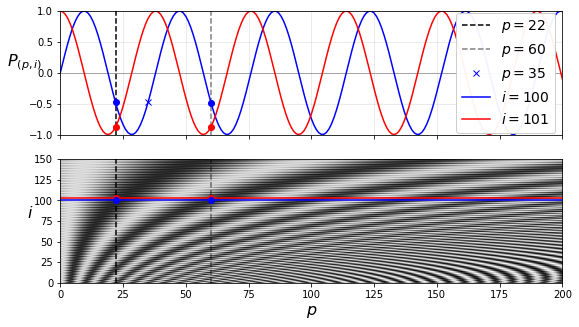

In [44]:
import matplotlib.pyplot as plt
i1, i2, crop_i = 100, 101, 150
p1, p2, p3 = 22, 60, 35

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 5))

ax1.plot([p1, p1], [-1, 1], "k--", label="$p = {}$".format(p1))
ax1.plot([p2, p2], [-1, 1], "k--", label="$p = {}$".format(p2), alpha=0.5)
ax1.plot(p3, PE[p3, i1], "bx", label="$p = {}$".format(p3))
ax1.plot(PE[:,i1], "b-", label="$i = {}$".format(i1))
ax1.plot(PE[:,i2], "r-", label="$i = {}$".format(i2))
ax1.plot([p1, p2], [PE[p1, i1], PE[p2, i1]], "bo")
ax1.plot([p1, p2], [PE[p1, i2], PE[p2, i2]], "ro")
ax1.legend(loc="center right", fontsize=14, framealpha=0.95)
ax1.set_ylabel("$P_{(p,i)}$", rotation=0, fontsize=16)
ax1.grid(True, alpha=0.3)
ax1.hlines(0, 0, max_steps - 1, color="k", linewidth=1, alpha=0.3)
ax1.axis([0, max_steps - 1, -1, 1])

ax2.imshow(PE.T[:crop_i], cmap="gray", interpolation="bilinear", aspect="auto")
ax2.hlines(i1, 0, max_steps - 1, color="b")
cheat = 2 # need to raise the red line a bit, or else it hides the blue one
ax2.hlines(i2+cheat, 0, max_steps - 1, color="r")
ax2.plot([p1, p1], [0, crop_i], "k--")
ax2.plot([p2, p2], [0, crop_i], "k--", alpha=0.5)
ax2.plot([p1, p2], [i2+cheat, i2+cheat], "ro")
ax2.plot([p1, p2], [i1, i1], "bo")
ax2.axis([0, max_steps - 1, 0, crop_i])
ax2.set_xlabel("$p$", fontsize=16)
ax2.set_ylabel("$i$", rotation=0, fontsize=16)

plt.show()

### Multi-head Attention

In [ ]:
K = keras.backend

class MultiHeadAttention(keras.layers.Layer):
    
    __doc__= """实现 Transformer 的 multi-head 自注意力机制
    """
    
    def __init__(self, n_heads, causal=False, use_scale=False, **kwargs):
        # 一些参数的初始化
        self.n_heads = n_heads
        self.causal = causal
        self.use_scale = use_scale
        super().__init__(**kwargs)
    
    def build(self, batch_input_shape):
        # 由于输入的是Q，K，V三个相同维度的3D矩阵，所以这里取出一个进行计算
        self.dims = batch_input_shape[0][-1] # 取出最后一个维度
        self.q_dims, self.v_dims, self.k_dims = [self.dims // self.n_heads] * 3 # 计算每个头的维度，可以设置为超参数
        # 这里的一维卷积投影，一次投影直接将n个头的结果全部计算出来了，即投影到了 n_head * proj_dim
        self.q_linear = keras.layers.Conv1D(self.n_heads * self.q_dims, kernel_size=1, use_bias=False) # 1维卷积投影，和时序Dense作用相同
        self.v_linear = keras.layers.Conv1D(self.n_heads * self.v_dims, kernel_size=1, use_bias=False) # 1维卷积投影
        self.k_linear = keras.layers.Conv1D(self.n_heads * self.k_dims, kernel_size=1, use_bias=False) # 1维卷积投影
        self.attention = keras.layers.Attention(causal=self.causal, use_scale=self.use_scale)  # 点积attention
        self.out_linear = keras.layers.Conv1D(self.dims, kernel_size=1, use_bias=False) # 重新投影回去
        super().build(batch_input_shape) 
    
    def _multi_head_linear(self, inputs, linear):
        """
        将输入经过多头投影，返回多个头经过堆叠的结果 [batch_size * n_head, t, dim]
        """
        # shape = [batch_size, t] + [n_heads, -1] = [batch_size, t, n_head, -1]
        shape = K.concatenate([K.shape(inputs)[:-1], [self.n_heads, -1]])
        
        # linear(input).shape = [batch_size, t, n_head * dim]
        # projected.shape = [batch_size, t, n_head, dim] 恰好分开了每个头的结果
        projected = K.reshape(linear(inputs), shape)
        
        # 调换后 perm.shape = [batch_size, n_head, t, dim]
        perm = K.permute_dimensions(projected, [0, 2, 1, 3])
        
        # 输出的shape = [batch_size * n_head, t, dim]
        return K.reshape(perm, [shape[0] * self.n_heads, shape[1], -1])
    
    def call(self, inputs):
        
        q = inputs[0]
        v = inputs[1]
        k = inputs[2] if len(inputs) > 2 else v
        
        shape = K.shape(q)
        
        q_proj = self._multi_head_linear(q, self.q_linear)
        v_proj = self._multi_head_linear(v, self.v_linear)
        k_proj = self._multi_head_linear(k, self.k_linear) # shape = [batch_size * n_head, t, dim]，相当于把多个头的结果堆叠起来
        
        #之所以将矩阵后两维变为t，dim就是为了attention点积
        multi_attended = self.attention([q_proj, v_proj, k_proj]) # 张量矩阵乘法后的shape = [batch_size * n_head, t, dim]
        shape_attended = K.shape(multi_attended) # [batch_size * n_head, t, dim]
        reshaped_attended = K.reshape(multi_attended, [shape[0], self.n_heads, shape_attended[1], shape_attended[2]]) #[batch_size , n_head, t, dim]
        perm = K.permute_dimensions(reshaped_attended, [0, 2, 1, 3]) # [batch_size, t, n_head, dim]
        concat = K.reshape(perm, [shape[0], shape_attended[1], -1]) # [batch_size, t, n_head * dim]
        
        return self.out_linear(concat) # 经过新的线性变换后：[batch_size, t, dim]

## Seq2Seq练习：时间字符串转换网络

Train an Encoder–Decoder model that can convert a date string from one format to another (e.g., from "April 22, 2019" to "2019-04-22")

#### 生产数据集

In [46]:
# 随机生成一些在1000-01-01 到9999-12-31的日期
from datetime import date

# cannot use strftime()'s %B format since it depends on the locale
MONTHS = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

def random_dates(n_dates):
    min_date = date(1000, 1, 1).toordinal()
    max_date = date(9999, 12, 31).toordinal()

    # 获取max和min的顺序编号，在这个区间内产生随机产生整数
    ordinals = np.random.randint(max_date - min_date, size=n_dates) + min_date
    dates = [date.fromordinal(ordinal) for ordinal in ordinals]

    x = [MONTHS[dt.month - 1] + " " + dt.strftime("%d, %Y") for dt in dates]
    y = [dt.isoformat() for dt in dates]
    return x, y

In [47]:
np.random.seed(42)

n_dates = 3
x_example, y_example = random_dates(n_dates)
print("{:25s}{:25s}".format("Input", "Target")) #{:25s}代表填充到25个空格
print("-" * 50)
for idx in range(n_dates):
    print("{:25s}{:25s}".format(x_example[idx], y_example[idx]))

Input                    Target                   
--------------------------------------------------
September 20, 7075       7075-09-20               
May 15, 8579             8579-05-15               
January 11, 7103         7103-01-11               


#### 转换为词向量
由于输入的字符串和输出的字符串实际上只限制在几个字母（月份和数字），所以不用像电影评论一样进行计数，只需要直接计算出其中unique的字符串即可

In [48]:
# 可能出现的只可能在月份和数字，以及逗号中
INPUT_CHARS = "".join(sorted(set("".join(MONTHS) + "0123456789, ")))
INPUT_CHARS

' ,0123456789ADFJMNOSabceghilmnoprstuvy'

In [50]:
# 可能的输出只有数字和斜杠
OUTPUT_CHARS = "0123456789-"

In [51]:
# 定义一个将日期字符串转换为id的函数
def date_str_to_ids(date_str, chars=INPUT_CHARS):
    return [chars.index(c) for c in date_str]

In [52]:
# 测试一下
date_str_to_ids(x_example[0], INPUT_CHARS)

[19, 23, 31, 34, 23, 28, 21, 23, 32, 0, 4, 2, 1, 0, 9, 2, 9, 7]

In [55]:
def prepare_date_strs(date_strs, chars = INPUT_CHARS):
    X_ids = [date_str_to_ids(dt, chars) for dt in date_strs]
    X = tf.ragged.constant(X_ids, ragged_rank=1) #由于生成的字符串可能长度不一，所以在1轴的方向生成一个ragged rank
    return (X + 1).to_tensor() #由于ragged tensor的defualt填充值为0，所以这里+1，将0作为padding ID

def create_dataset(n_dates):
   x,y = random_dates(n_dates)
   return prepare_date_strs(x, INPUT_CHARS), prepare_date_strs(y, OUTPUT_CHARS) 

In [56]:
np.random.seed(42)

X_train, Y_train = create_dataset(10000)
X_valid, Y_valid = create_dataset(2000)
X_test, Y_test = create_dataset(2000)

In [57]:
Y_train[0]

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 8,  1,  8,  6, 11,  1, 10, 11,  3,  1], dtype=int32)>

#### Model V1

we feed in the input sequence, which first goes through the encoder (an embedding layer followed by a single LSTM layer), which outputs a vector, then it goes through a decoder (a single LSTM layer, followed by a dense output layer), which outputs a sequence of vectors, each representing the estimated probabilities for all possible output character.

Since the decoder expects a sequence as input, we repeat the vector (which is output by the decoder) as many times as the longest possible output sequence.

In [ ]:
embedding_size = 32 #embedding size
max_output_length = Y_train.shape[1] #最长的Y序列长度，用于扩展encoder输出的一维向量为seq

np.random.seed(42)
tf.random.set_seed(42)

# encoder，一个简单的LSTM单元，输出的128维的向量，不是序列
encoder = keras.models.Sequential([
    keras.layers.Embedding(input_dim=len(INPUT_CHARS) + 1,
                           output_dim=embedding_size,
                           input_shape=[None]),
    keras.layers.LSTM(128)
])

# decoder：接收encoder输出的被扩展后的t*128的矩阵，输出一个seq
decoder = keras.models.Sequential([
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.Dense(len(OUTPUT_CHARS) + 1, activation="softmax")
])

# 主模型
model = keras.models.Sequential([
    encoder,
    keras.layers.RepeatVector(max_output_length), #重复vector为seq
    decoder
])

optimizer = keras.optimizers.Nadam()
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

由于这里的训练数据使用了ragged tensor，所以长度都是18（最长日期字符串的长度），但是当输入的长度比较小的时候表现比较差，所以需要将输入同样填充为最长字符串的长度

In [58]:
max_input_length = X_train.shape[1]

def prepare_date_strs_padded(date_strs):
    X = prepare_date_strs(date_strs)
    if X.shape[1] < max_input_length:
        X = tf.pad(X, [[0, 0], [0, max_input_length - X.shape[1]]])
    return X

def convert_date_strs(date_strs):
    X = prepare_date_strs_padded(date_strs)
    #ids = model.predict_classes(X)
    ids = np.argmax(model.predict(X), axis=-1)
    return ids_to_date_strs(ids)

#### ModelV2：将Y shift作为信息输入encoder

* Instead of feeding the decoder a simple repetition of the encoder's output vector
    * we can feed it the target sequence, shifted by one time step to the right
    * at each time step the decoder will know what the previous target character was. This should help is tackle more complex sequence-to-sequence problems.

* Since the first output character of each target sequence has no previous character, we will need a new token to represent the start-of-sequence (sos).

* During inference, we won't know the target, so what will we feed the decoder? 
    * We can just predict one character at a time, starting with an sos token, then feeding the decoder all the characters that were predicted so far 

* But if the decoder's LSTM expects to get the previous target as input at each step, how shall we pass it it the vector output by the encoder? 
    * Well, one option is to ignore the output vector, and instead use the encoder's LSTM state as the initial state of the decoder's LSTM (which requires that encoder's LSTM must have the same number of units as the decoder's LSTM).

Now let's create the decoder's inputs (for training, validation and testing). The sos token will be represented using the last possible output character's ID + 1.

In [59]:
# 用最长的长度的后一位代表SOS token
sos_id = len(OUTPUT_CHARS) + 1

def shifted_output_sequences(Y):
    sos_tokens = tf.fill(dims=(len(Y), 1), value=sos_id) # 产生一个batch * 1的vector，sos 
    return tf.concat([sos_tokens, Y[:, :-1]], axis=1) # 去除Y的最后一个token，将sos拼在开始位置

# 加工为decoder输入的Y数据，这些Y数据保证在预测t的时候decoder只能看到t-1以及之前的数据，看不到t之后的数据
X_train_decoder = shifted_output_sequences(Y_train)
X_valid_decoder = shifted_output_sequences(Y_valid)
X_test_decoder = shifted_output_sequences(Y_test)

In [60]:
X_train_decoder

<tf.Tensor: shape=(10000, 10), dtype=int32, numpy=
array([[12,  8,  1, ..., 10, 11,  3],
       [12,  9,  6, ...,  6, 11,  2],
       [12,  8,  2, ...,  2, 11,  2],
       ...,
       [12, 10,  8, ...,  2, 11,  4],
       [12,  2,  2, ...,  3, 11,  3],
       [12,  8,  9, ...,  8, 11,  3]], dtype=int32)>

In [61]:
# 建立这个较为复杂的模型

# 设置初始参数
encoder_embedding_size = 32
decoder_embedding_size = 32
lstm_units = 128

# seed
np.random.seed(42)
tf.random.set_seed(42)

# encoder部分
encoder_input = keras.layers.Input(shape=[None], dtype=tf.int32) # 初始化input

encoder_embedding = keras.layers.Embedding(
    input_dim=len(INPUT_CHARS) + 1,
    output_dim=encoder_embedding_size)(encoder_input)            # 将input输入embedding

_, encoder_state_h, encoder_state_c = keras.layers.LSTM(        # 输入LSTM，保留其state
    lstm_units, return_state=True)(encoder_embedding)

encoder_state = [encoder_state_h, encoder_state_c] # 保留encoder的LSTM的state，后续作为encoder的信息输入给decoder

# decoder部分
decoder_input = keras.layers.Input(shape=[None], dtype=tf.int32)

decoder_embedding = keras.layers.Embedding(
    input_dim=len(OUTPUT_CHARS) + 2,
    output_dim=decoder_embedding_size)(decoder_input)
## ---- 将LSTM的初始条件设置为encoder的，然后输入embedding的数据
decoder_lstm_output = keras.layers.LSTM(lstm_units, return_sequences=True)(
    decoder_embedding, initial_state=encoder_state)
## ---- 预测
decoder_output = keras.layers.Dense(len(OUTPUT_CHARS) + 1,
                                    activation="softmax")(decoder_lstm_output)

# 模型定义
model = keras.models.Model(inputs=[encoder_input, decoder_input],
                           outputs=[decoder_output])

# 模型编译
optimizer = keras.optimizers.Nadam()
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit([X_train, X_train_decoder], Y_train, epochs=10,
                    validation_data=([X_valid, X_valid_decoder], Y_valid))

In [ ]:
# 在进行预测时候，我们将一个一个预测
sos_id = len(OUTPUT_CHARS) + 1

def predict_date_strs(date_strs):
    """
    逐步预测str dates
    """
    # 先将输入的X转为token，形状为batch * t * 1
    X = prepare_date_strs_padded(date_strs)
    # 初始化Y_pred，第一个预测是sos，此时的形状为batch * 1 * 1
    Y_pred = tf.fill(dims=(len(X), 1), value=sos_id)
    # 沿着时间进行遍历
    for index in range(max_output_length):
        # 计算此时应该对Y_pred的填充
        pad_size = max_output_length - Y_pred.shape[1]
        # 合成为decoder输入的信息
        X_decoder = tf.pad(Y_pred, [[0, 0], [0, pad_size]])
        # 使用模型预测下一个字符，取出，形状为batch * 1 * 1
        Y_probas_next = model.predict([X, X_decoder])[:, index:index+1]
        # 转换为token
        Y_pred_next = tf.argmax(Y_probas_next, axis=-1, output_type=tf.int32)
        # concat到Y_pred上，进入下一个预测
        Y_pred = tf.concat([Y_pred, Y_pred_next], axis=1)
        
    return ids_to_date_strs(Y_pred[:, 1:])

以上实例是我们手动的执行了每一步的sample和predict，但是tfa实际上已经将这些功能集成在了decoder类和sampler类中，可以直接调用实现。下面就使用tfa的接口定义了一个和上面完全相同的模型。

In [ ]:
import tensorflow_addons as tfa
# 设置一些模型参数
np.random.seed(42)
tf.random.set_seed(42)

encoder_embedding_size = 32
decoder_embedding_size = 32
units = 128

# 定义模型的输入
encoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
decoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
sequence_lengths = keras.layers.Input(shape=[], dtype=np.int32)

# 设置embedding层  
encoder_embeddings = keras.layers.Embedding(
    len(INPUT_CHARS) + 1, encoder_embedding_size)(encoder_inputs)

decoder_embedding_layer = keras.layers.Embedding(
    len(OUTPUT_CHARS) + 2, decoder_embedding_size)
decoder_embeddings = decoder_embedding_layer(decoder_inputs)

# 设置encoder，获取最终输出和state，并且保存作为输入
encoder = keras.layers.LSTM(units, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_embeddings)
encoder_state = [state_h, state_c]

# 定义一个简单的sampler，帮助我们挨个喂入数据
sampler = tfa.seq2seq.sampler.TrainingSampler()

# 定义decoder
decoder_cell = keras.layers.LSTMCell(units)
output_layer = keras.layers.Dense(len(OUTPUT_CHARS) + 1)

decoder = tfa.seq2seq.basic_decoder.BasicDecoder(decoder_cell, #cell
                                                 sampler,      # sampler
                                                 output_layer=output_layer)#输出
# 定义最终的输出
final_outputs, final_state, final_sequence_lengths = decoder(
    decoder_embeddings,
    initial_state=encoder_state)
# 最终输出softmax
Y_proba = keras.layers.Activation("softmax")(final_outputs.rnn_output)
# 模型定义
model = keras.models.Model(inputs=[encoder_inputs, decoder_inputs],
                           outputs=[Y_proba])

# 模型的编译和拟合
optimizer = keras.optimizers.Nadam()
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit([X_train, X_train_decoder], Y_train, epochs=15,
                    validation_data=([X_valid, X_valid_decoder], Y_valid))

However, there's a much more efficient way to perform inference. Until now, during inference, we've run the model once for each new character. Instead, we can create a new decoder, based on the previously trained layers, but using a `GreedyEmbeddingSampler` instead of a `TrainingSampler`.

At each time step, the `GreedyEmbeddingSampler` will compute the argmax of the decoder's outputs, and run the resulting token IDs through the decoder's embedding layer. Then it will feed the resulting embeddings to the decoder's LSTM cell at the next time step. This way, we only need to run the decoder once to get the full prediction.

在训练时候，定义了一个sampler来帮助我们喂入数据，而在预测时候，我们可以通过调用已经训练好的模型，改变一个自动化的sampler来帮助我们逐步进行推理

A few notes:
* The `GreedyEmbeddingSampler` needs the `start_tokens` (a vector containing the start-of-sequence ID for each decoder sequence), and the `end_token` (the decoder will stop decoding a sequence once the model outputs this token).
* We must set `maximum_iterations` when creating the `BasicDecoder`, or else it may run into an infinite loop (if the model never outputs the end token for at least one of the sequences). This would force you would to restart the Jupyter kernel.
* The decoder inputs are not needed anymore, since all the decoder inputs are generated dynamically based on the outputs from the previous time step.
* The model's outputs are `final_outputs.sample_id` instead of the softmax of `final_outputs.rnn_outputs`. This allows us to directly get the argmax of the model's outputs. If you prefer to have access to the logits, you can replace `final_outputs.sample_id` with `final_outputs.rnn_outputs`.

https://tensorflow.google.cn/addons/api_docs/python/tfa/seq2seq/Sampler

In [ ]:
# 初始化sampler，sampler会将输出经过embedding fn处理，然后输入下一个step
inference_sampler = tfa.seq2seq.sampler.GreedyEmbeddingSampler(
    embedding_fn=decoder_embedding_layer)
# 使用已经训练好的模型，重新定义一个decoder
inference_decoder = tfa.seq2seq.basic_decoder.BasicDecoder(
    decoder_cell, inference_sampler, output_layer=output_layer,
    maximum_iterations=max_output_length)

# 为模型传入初始状态后，就可以自动进行逐步推断
batch_size = tf.shape(encoder_inputs)[:1]
start_tokens = tf.fill(dims=batch_size, value=sos_id)
final_outputs, final_state, final_sequence_lengths = inference_decoder(
    start_tokens,
    initial_state=encoder_state,
    start_tokens=start_tokens,
    end_token=0)

inference_model = keras.models.Model(inputs=[encoder_inputs],
                                     outputs=[final_outputs.sample_id])

In [ ]:
def fast_predict_date_strs(date_strs):
    X = prepare_date_strs_padded(date_strs)
    Y_pred = inference_model.predict(X)
    return ids_to_date_strs(Y_pred)

# 2021.11.27
## 知识点：
* 线性autoencoder：PCA
* 深层AE
* 重用weight的AE
* 卷积AE & 循环AE
* 去躁AE
* 稀疏AE
* 变分AE
* GAN

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

import sys
assert sys.version_info >= (3, 5)

## AutoEncoder

### PCA：线性AutoEncoder

In [4]:
# 使用MSE以及简单线性层的AE实际上实现了PCA算法

# 这里用3D数据作为示例
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [6]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape = [3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape = [2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss = 'mse', optimizer = keras.optimizers.SGD(learning_rate=1.5))
history = autoencoder.fit(X_train, X_train, epochs = 20)

Epoch 1/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3081
Epoch 2/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1598
Epoch 3/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0485
Epoch 4/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0419
Epoch 5/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0617
Epoch 6/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0756
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1092
Epoch 8/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0465
Epoch 9/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 10/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 12/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 13/20
2/2 [==============================] - 0s 1ms/step - loss: 0.

In [7]:
coding = encoder.predict(X_train)

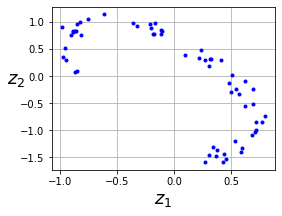

In [13]:
fig = plt.figure(figsize=(4,3))
plt.plot(coding[:,0], coding[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## 搭建更深层的AutoEncoder

值得注意的是，在建立AE时，可以在encoding端搭建更深层次的网络结构，但是在decodong端不能搭建过深，因为decoder的能力变强意味着encoder的能力变弱。

In [15]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255    # 将像素数值归一化0-1
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [16]:
# 假设这里要训练对于一个28 * 28的图片进行降维
# 对于图片像素的灰度，我们使用二元预测的方式进行评估，即输出的数字为像素黑色的概率

def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [17]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3814 - rounded_accuracy: 0.8487 - val_loss: 0.3173 - val_rounded_accuracy: 0.8989
Epoch 2/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3083 - rounded_accuracy: 0.9126 - val_loss: 0.3020 - val_rounded_accuracy: 0.9199
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2998 - rounded_accuracy: 0.9203 - val_loss: 0.2986 - val_rounded_accuracy: 0.9197
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2959 - rounded_accuracy: 0.9240 - val_loss: 0.2938 - val_rounded_accuracy: 0.9285
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2928 - rounded_accuracy: 0.9268 - val_loss: 0.2919 - val_rounded_accuracy: 0.9284
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2920 - rounded_accuracy: 0.9283 - val_loss: 0.2914 - val_rounded_accuracy: 0.9306
Epoch 7/20
1719/1719 [==================

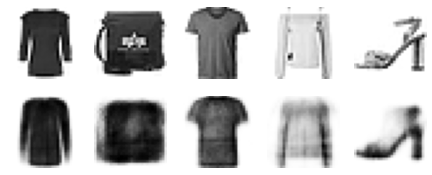

In [19]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)

对于AE来说，一个重要的应用就是先用AE对于数据进行无监督预学习，尽可能的将数据中的重要特征提取出来，然后用着这些重要的特征对于数据进行分类或者在小部分具有标签的数据上进行模型的训练。

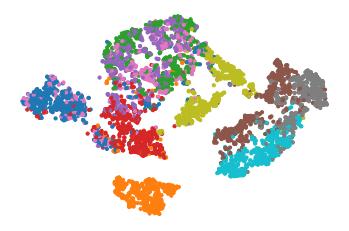

In [20]:
np.random.seed(42)

from sklearn.manifold import TSNE

# 数据预处理
X_valid_compressed = stacked_encoder.predict(X_valid)
# 用预处理的数据进行分类
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())
# 可视化
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

## Tying weights
如果我们想构建一个完全对称的AE，一个可行的方法是让这个网络共享Encoder和Decoder的权重，这样可以避免过拟合，因为训练参数几乎减小了一半

In [21]:
# 创建一个 “对称Dense”：输入和输出的维度与参数dense相反，并且直接使用dense的维度
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)

    def build(self, batch_input_shape):
        # 虽然使用旧的weight，但是使用新的bias
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
                    
        super().build(batch_input_shape)
    def call(self, inputs):

        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        
        return self.activation(z + self.biases)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

## 卷积自编码和循环自编码

In [ ]:
# 卷积
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

In [ ]:
# 循环
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30)
])
recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]), # 把batch * 30 变成 batch * 28 * 30
    keras.layers.LSTM(100, return_sequences=True), # batch * 28 * 100
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid")) # batch*28*28
])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1),
                     metrics=[rounded_accuracy])

## 去噪自编码（&dropout）

这类自编码在encoding前加入高斯噪音，就算encoding维度没有降低，训练也会逼迫网络学习数据中有用的特征

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2), #只有在训练时候才会加入
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])

denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])

history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

或者使用dropout，在训练时强迫神经元部分关闭，使得部分样本缺失，而尝试让网络修复这些缺失的样本，在这个过程中学习到样本中的重要数据特征

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                   metrics=[rounded_accuracy])

history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

## 稀疏自动编码器

通过在loss中直接加入模型输出的l1范数来强迫模型减少输出（eg 输出都为0），但是同时loss会要求模型尽可能的还原数据，所以这时模型只能在有限的输出中尽可能的输出对于还原有用的重要信息，也就同时学习到了数据的重要特征。

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

上面的网络使用了ActivityRegularization来限制输出，使得神经元的输出激活比例变低。另外一种方式就是指定一个目标的激活比例，计算现在激活比例和目标激活比例的差距，使用这个差距作为ActivityRegularization的系数对于模型进行惩罚。这里的“差距”定义为目前激活比例与目标激活比例的KL散度。

(0.0, 1.0, 0.0, 0.95)

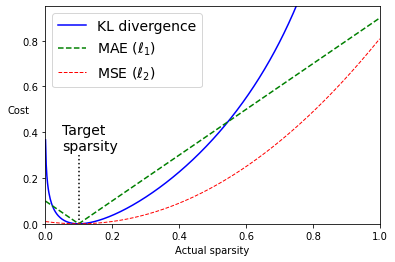

In [24]:
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
mse = (p - q)**2
mae = np.abs(p - q)
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nsparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Actual sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 0.95])


In [26]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        # weight决定了我们取多少比例的惩罚加入最终的loss
        self.weight = weight
        self.target = target
    
    def __call__(self, inputs):
        # 值得注意的是，这里使用mean作为激活的比例，是因为encoder的最后一层输出是sigmoid
        mean_activities = K.mean(inputs, axis=0) # 为什么axis=0呢？
        #因为这里是求出每个fearture的平均值而不是每个样本所有feature的平均值，
        #我们想看的是有多少神经元被激活
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg) # 注意这里是activity_regularizer
                                                                                # 对于参数的reg是kernel_regularizer
])

sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])

sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
              metrics=[rounded_accuracy])

history = sparse_kl_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

## 变分自编码
变分自编码器将样本特征投影到一个高斯分布的高维空间中去，分别计算这个高维向量的均值向量以及std，这是encoder做的事。而对于decoder，它要解码的不是均值向量，而是在这个均值向量喝std向量生成的随机高斯分布中的一个样本点，用这个样本点（同样是一个高维向量）进行还原。

### 两点值得注意：
    * 由于decoder解码的是采样点，需要设计采样过程，无法使用sequential模型
    * 由于目标是将输入向量的复杂分布映射到一个高斯分布上去，所以要有一个单独的损失函数惩罚映射后的点是否符合高斯分布

In [27]:
# 采样
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

# encoder
inputs = keras.layers.Input(shape=[28, 28])

z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
### 产生mean和log（std）
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
### 采样
codings = Sampling()([codings_mean, codings_log_var])
### 拼接encoder
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

# decoder
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

# 最终模型
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

# 映射到高斯分布带来的损失(数学细节参考书本章节)
latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
# 注意这里处以784是因为kears计算损失的时候(binary_crossentropy)是平均到每个像素的
variational_ae.add_loss(K.mean(latent_loss) / 784.)
# 编译模型
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

## GAN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30
# 分别创建一个生成器，一个辨别器

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])

gan = keras.models.Sequential([generator, discriminator])

In [ ]:
# 编译模型，第一步要将辨别器设置为不可训练
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    # 取出提前定义好的layer
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        # 进入一个epoch
        print("Epoch {}/{}".format(epoch + 1, n_epochs))              
        # 进入一个batch
        for X_batch in dataset:
            
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])  # 生成随机噪音
            generated_images = generator(noise)                         # 生成图片
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0) # 将真实图片和虚假图片拼接成2*batch的大小
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size) # 生成y
            discriminator.trainable = True                              # 设置辨别器可训练
            discriminator.train_on_batch(X_fake_and_real, y1)           # 在batch上对辨别器进行训练
            
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])  # 再次生成随机噪音
            y2 = tf.constant([[1.]] * batch_size)                       # 对于这些噪音的y都取1
            discriminator.trainable = False                             # 固定辨别器
            # 这里实际上是固定辨别器，让生成器产生图片，这些图片的标签都是1，所以为了减小损失，生成器被迫产生逼真的图片
            gan.train_on_batch(noise, y2)                               # 训练生成器
            
        plot_multiple_images(generated_images, 8)                 
        plt.show()    

## 练习

### 使用二元自编码器进行Hash编码

这里我们仍然使用minist数据集，目的是为每个图片产生其独特的hash编码

In [28]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

我们的编码一共有16位，要实现这一点，我们需要构建一个具有16位输出的AE，并且为了保证输出是二元的，使用sigmiod激活。在sigmoid层之前，我们加入一个非常大的高斯噪音，这会迫使噪音前的layer输出尽可能大的值，不然输出就会被噪音消灭，而大的输出会使得sigmoid的值非常接近0或1，这是我们想要达到的效果。

如果训练成果的话，对于相似的图片，编码器会给出相同的编码。

In [29]:
tf.random.set_seed(42)
np.random.seed(42)

hashing_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.GaussianNoise(15.),            # 量级很大的高斯噪音
    keras.layers.Dense(16, activation="sigmoid"),
])

hashing_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[16]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

hashing_ae = keras.models.Sequential([hashing_encoder, hashing_decoder])

hashing_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Nadam(),
                   metrics=[rounded_accuracy])

history = hashing_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 0.4462 - rounded_accuracy: 0.7827 - val_loss: 0.3881 - val_rounded_accuracy: 0.8251
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3712 - rounded_accuracy: 0.8455 - val_loss: 0.3706 - val_rounded_accuracy: 0.8402
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3587 - rounded_accuracy: 0.8567 - val_loss: 0.3619 - val_rounded_accuracy: 0.8514
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3532 - rounded_accuracy: 0.8631 - val_loss: 0.3559 - val_rounded_accuracy: 0.8614
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3486 - rounded_accuracy: 0.8680 - val_loss: 0.3472 - val_rounded_accuracy: 0.8689
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3467 - rounded_accuracy: 0.8704 - val_loss: 0.3448 - val_rounded_accuracy: 0.8747
Epoch 7/10
1719/1719 [==================

In [36]:
# 使用训练好的encoder对于实例进行编码
hashes = np.round(hashing_encoder.predict(X_valid)).astype(np.int32)
# 将编码从2进制转换为10进制
hashes *= np.array([[2**bit for bit in range(16)]])
hashes = hashes.sum(axis=1)
# 查看10进制数的2进制数
for h in hashes[:5]:
    print("{:016b}".format(h))
print("...")

0000100101011011
0000100100110011
0100100100011011
0001100111001010
0001010100110000
...


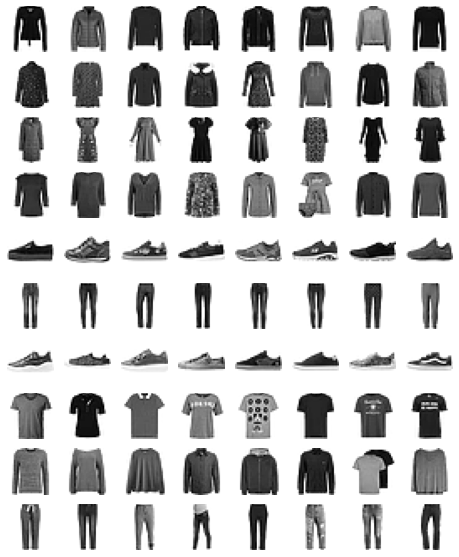

In [37]:
# 查看最常见的一些hash值以及其对应的一些图片实例
from collections import Counter

n_hashes = 10
n_images = 8

top_hashes = Counter(hashes).most_common(n_hashes)

plt.figure(figsize=(n_images, n_hashes))
for hash_index, (image_hash, hash_count) in enumerate(top_hashes):
    indices = (hashes == image_hash)
    for index, image in enumerate(X_valid[indices][:n_images]):
        plt.subplot(n_hashes, n_images, hash_index * n_images + index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")